# 1 - Introduction

Nama : Mukhlish Rasyidi

Batch : FTDS-018-RMT

Dataset : churn.csv , merupakan dataset dari project Milestone 1 phase 2 FTDS terkait data customer yang berpindah ke platform lain dan yang tetap menjadi customer di platformnya.

Objective : Dalam persaingan dunia e-commerce merebut hati customer merupakan salah satu dari target yang dikejar oleh para Platform e-commerce. Semua platform berusaha memberikan pelayanan yang terbaik agar customer selalu membeli dari websitenya dan tidak pindah ke platform lain. Banyak hal yang dilakukan oleh platform diantaranya memberikan diskon, menawarkan promo- promo produk, menyediakan customer service 24 jam untuk melayani komplain customer, dan juga memastikan barang yang dijual berkualitas dan lebih murah dari platform lain.

Namun pada kenyataannya dengan sistem sebagai platform e-commerce, perusahaan tidak dapat mengkontrol semua kualitas dari produk yang dijual mitra. Masih saja ada produk yang tidak berkualitas ( tidak lulus QC atau QA), tidak ber SNI, barang tiruan/kw, dan lain sebagainya yang membuat para customer yang membeli merasa kecewa atau merasa di tipu. Tentunya peran perusahaan harus bisa menyediakan customer service yang handal dalam mentackle komplain dan bisa memberikan keputusan yang tidak merugikan customer. Hal ini setidaknya bisa mengobati rasa kecewanya customer.

Selain itu customer yang selektif akan berusaha membandingkan harga antar platform untuk mencari yang termurah dan terlengkap. Meskipun pelayanan dan kualitas platformnya baik, namun harganya jauh lebih mahal dan tidak lengkap, kemungkinan besar customer bisa pindah ke platform lain.

Berdasarkan hal - hal tersebut, perusahaan platform ecommerce perlu melakukan evaluasi dari program yang telah dilakukan apakah memiliki dampak positif yang membuat customer loyal atau jangan- jangan program yang telah dibuat tidak berhasil dan customer akhirnya tetap pindah ke platform lain. Evaluasi yang dilakukan adalah menganalisis data churn customer dibandingkan dengan data- data program yang sudah dijalankan dan pengalaman/ kendala yang dialami customer selama berbelanja.

Dalam project kali ini objectivenya adalah membuat model dengan algoritma Artificial Neural Network untuk mempelajari hasil evaluasi data churn salah satu platform e-commerce, sehingga bisa memprediksi apakah customernya akan churn ke platform lain atau tidak. 

Poin penting disini adalah evaluasi dalam ketepatan recall score atau ketepatan model untuk memprediksi customer churn dibandingkan aktual customer yang churn. Sebisa mungkin model ini bisa mencapai diatas 90% score recallnya. Dengan nilai recall semakin besar, berarti kesalahan memprediksi customer yang diprediksi tidak churn dan ternyata churn akan semakin kecil sehingga perusahaan tidak akan kehilangan customer dan bisa langsung memberikan program khusus untuk customer yang diprediksi akan churn. 

Sementara untuk nilai precision pada kondisi ini tidak dijadikan concern karena ketika model salah memprediksi customer yang churn ternyata tidak churn, disatu sisi akan membuat customer semakin senang karena mendapatkan program khusus dan merasa platform ini lebih baik dibanding platform lain karena banyak promo dan pelayanan yang memuaskan. Namun tetap akan diusahakan memiliki nilai precision yang juga tinggi agar bisa mengurangi kerugian perusahaan mengeluarkan uang lebih untuk yang seharusnya tidak perlu dikeluarkan.




# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model 
from keras.callbacks import EarlyStopping



# 3 - Data Loading

In [2]:
# Read dataset
df= pd.read_csv('https://raw.githubusercontent.com/mukhlishr/rasyidi/main/churn.csv')

In [3]:
# duplicate dataset
df_copy = df.copy()

In [4]:
# Set display colum max xolumns
pd.set_option("display.max.columns", None)

In [5]:
# Show the first 5 data
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [6]:
# Show the last 5 data
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [7]:
# Check info over all dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Dari check info dataset diketahui dataset ini terdiri dari 22 columns dan 37.010 data. Dengan type data columns numeric continous 4 columns, numeric discrete/categoric 3 columns, dan categoric 15 columns. 

Dari sini juga terlihat adanya data missing values karena jumlah non-null counts tidak sama dengan jumlah data/ baris di columns 'gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', dan 'medium_of_operation'.

# 4 - Exploratory Data (EDA

In [8]:
# Check describe over all dataset with numeric dtype
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Dari describe data yang bertipe numeric bila melihat berdasarkan perbandingan mean dan median, ada yang sebaran datanya cukup simetris seperti columns 'age' dan 'avg_frequency_login_days'. Ada juga columns yang miring ke kiri  seperti column 'days_since_last_login' dan 'churn_risk_score'. Ada juga yang distribusinya miring ke kanan seperti columns 'avg_time_spent'. 

Berdasarkan nilai min dan max nya terlihat beberapa columns memiliki outliers karena nilai min dan max nya sangat jauh dari Q3 atau Q1. Untuk detail akan dicek lebih mendalam di setiap columnya. 

In [9]:
# Function to visualize columns categoric numeric
def diagnostic_pie(df):
    # Pieplot
  
    data = df.value_counts()
    keys = df.value_counts().index
    palette_color = sns.color_palette('bright')
    fig, ax=plt.subplots(figsize=(10,5))
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title('Pieplot')
    plt.show()
    print('Jumlah : \n', df.value_counts().sort_index())
    print('Percentage : \n', (df.value_counts().sort_index())/(df.shape[0]) * 100)

In [10]:
# Function to visualize columns categoric/ numeric categoric 
def diagnostic_plots(df):
    # Barplot

    fig, ax=plt.subplots(figsize=(10,5))
    sns.barplot(x=df.value_counts().index, y=df.value_counts())
    plt.xticks(rotation='vertical')
    plt.title('Barplot')
    plt.show()
    print('Jumlah : \n', df.value_counts().sort_index())
    print('Percentage : \n', (df.value_counts().sort_index())/(df.shape[0]) * 100)

In [11]:
# Function columns to target (numeric discrete/categoric)
def feature_target(df,target,y,col2):
  print('column vs target')
  a=df[df[target]==y].groupby([col2])[col2].count()/df[df[target]==y].shape[0]
  fig, ax=plt.subplots(figsize=(10,5))
  sns.barplot(x=a.index, y=a)
  plt.xticks(rotation='vertical')
  plt.title('column vs target')
  plt.show()
  print('Jumlah target positif :', df[df[target]==y].shape[0])
  print('Jumlah  : \n',df[df[target]==y].groupby([col2])[col2].count())
  print('Percentage : \n', df[df[target]==y].groupby([col2])[col2].count()/df[df[target]==y].shape[0]*100)


In [12]:
# Function columns to target (numeric continous)
def feature_target1(df,target,y,col2):
  print('column vs target')
  a=df[df[target]==y][col2]
  fig, ax=plt.subplots(figsize=(10,5))
  sns.histplot(a, bins=30, kde=True)
  plt.xticks(rotation='vertical')
  plt.title('column vs target')
  plt.show()



In [13]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots1(df):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df)
    plt.title('Boxplot')

    plt.show()
    # Check measurement scale, mode, and skewness
    print('Measurement Scale :',df.describe())
    print('Mode :', df.mode())
    print('Skew :', df.skew())

In [14]:
# make function to find upper and lower boundaries
def find_skewed_boundaries(df,col,distance):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

    lower_boundary = df[col].quantile(0.25) - (IQR * distance)
    upper_boundary = df[col].quantile(0.75) + (IQR * distance)

    # Percentage of outliers 

    print('Total data : {}'.format(len(df)))
    print('Total outliers : {}'.format(len(df[df[col] > upper_boundary])))
    print('Total outliers : {}'.format(len(df[df[col] < lower_boundary])))
    print('% Outliers upper: {}'.format(len(df[df[col] > upper_boundary])/len(df) * 100))
    print('% Outliers lower: {}'.format(len(df[df[col] < lower_boundary])/len(df) * 100))
    return upper_boundary, lower_boundary
   



In [15]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def normal_boundaries(df,col):
    upper_boundary = df[col].mean() + 3 * df[col].std()
    lower_boundary = df[col].mean() - 3 * df[col].std()

    # Percentage of outliers 

    print('Total data : {}'.format(len(df)))
    print('Total outliers : {}'.format(len(df[df[col] > upper_boundary])))
    print('Total outliers : {}'.format(len(df[df[col] < lower_boundary])))
    print('% Outliers upper: {}'.format(len(df[df[col] > upper_boundary])/len(df) * 100))
    print('% Outliers lower: {}'.format(len(df[df[col] < lower_boundary])/len(df) * 100))
    
    return upper_boundary, lower_boundary


## 4.1 - Check Columns Numeric

### Column churn_risk_score (target)

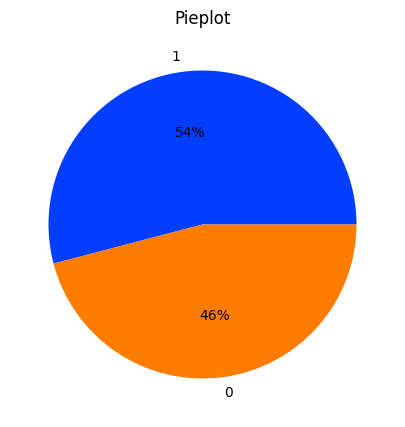

Jumlah : 
 0    16992
1    20018
Name: churn_risk_score, dtype: int64
Percentage : 
 0    45.911916
1    54.088084
Name: churn_risk_score, dtype: float64


In [16]:
# visualize the column target
diagnostic_pie(df['churn_risk_score'])

Berdasarkan pengamatan column target 'churn_risk_score' diketahui bahwa persentase target positif 54% dan target negatif 46%. Data ini termasuk sangat balanced namun memperlihatkan bahwa customer yang berpindah ke platform lain atau tidak lagi berbelanja di platform ini sangat banyak.  

### Column age

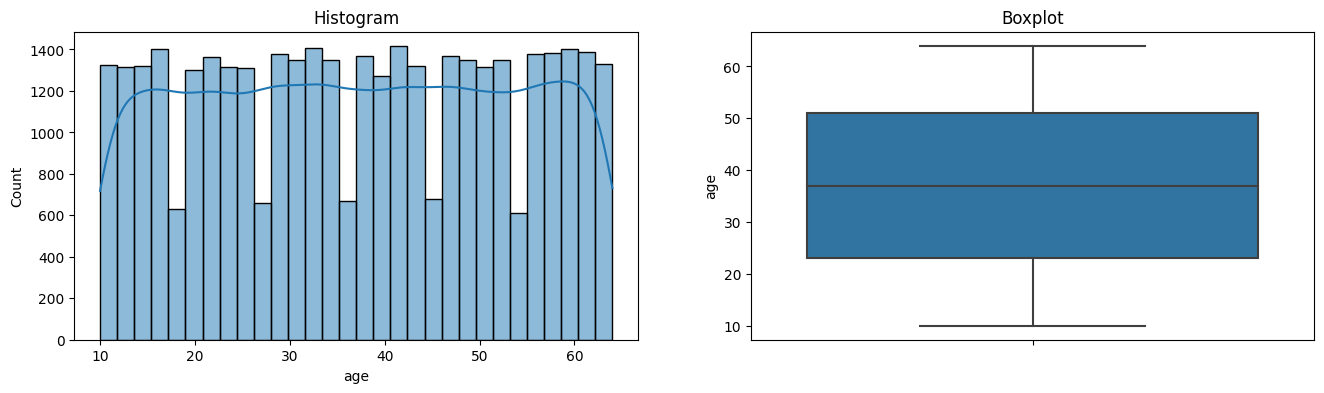

Measurement Scale : count    37010.000000
mean        37.120697
std         15.866834
min         10.000000
25%         23.000000
50%         37.000000
75%         51.000000
max         64.000000
Name: age, dtype: float64
Mode : 0    33
Name: age, dtype: int64
Skew : -0.007528816521120494


In [17]:
# Check the column 'age'
diagnostic_plots1(df['age'])

In [18]:
# Check the outliers using normal boundaries dueto the distribution data is normal/ not skew
normal_boundaries(df,'age')

Total data : 37010
Total outliers : 0
Total outliers : 0
% Outliers upper: 0.0
% Outliers lower: 0.0


(84.72120026970414, -10.479806051925166)

Berdasarkan pengamatan histogram, measurement scale, dan nilai skew terlihat untuk columns age terdistribusi normal. Sedangkan untuk outliers berdasarkan batas distribusi normal dengan 3* std deviasi, rentang nilai 'age' tidak ada yang melewati batas atas 84 dan batas bawah -10. 

Untuk memperjelas maka akan dilakukan binning berdasarkan kategori usia dan dibandingkan dengan features target. Berikut [Klasifikasi Kelompok Umur Manusia Berdasarkan Analisis Dimensifraktal Box Counting](https://www.neliti.com/id/publications/249455/klasifikasi-kelompok-umur-manusia-berdasarkan-analisis-dimensifraktal-box-counti) dari website neliti.com:

1. Remaja rentang usia 10 - 25 tahun = 1
2. Dewasa rentang usia 26 - 45 tahun = 2
3. Lansia rentang usia diatas 45 tahun = 3

In [19]:
# Create Binning age based on criteria
 
bins = [9, 25, 45, 100]
labels =[1,2,3]
df['binned_age'] = pd.cut(df['age'], bins,labels=labels).astype(int)

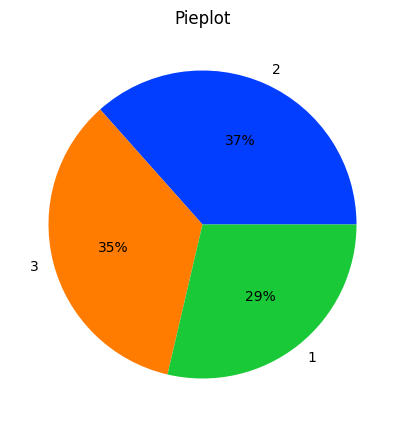

Jumlah : 
 1    10604
2    13535
3    12871
Name: binned_age, dtype: int64
Percentage : 
 1    28.651716
2    36.571197
3    34.777087
Name: binned_age, dtype: float64


In [20]:
# Check column binned age 
diagnostic_pie(df['binned_age'])

column vs target


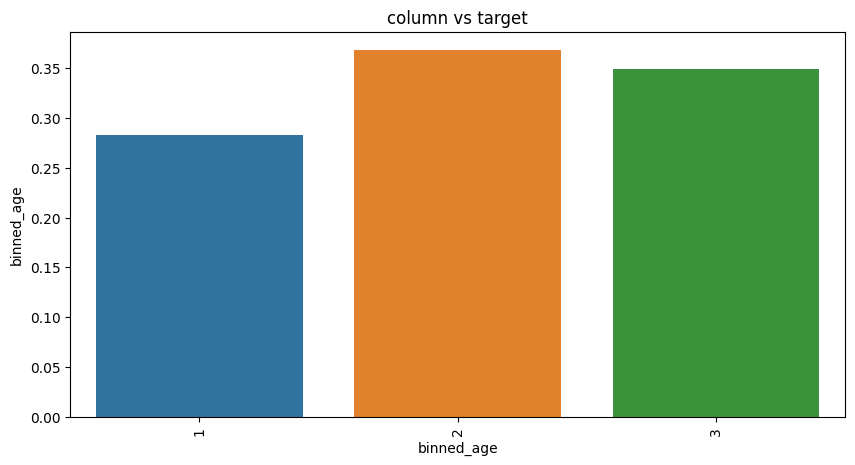

Jumlah target positif : 20018
Jumlah  : 
 binned_age
1    5666
2    7371
3    6981
Name: binned_age, dtype: int64
Percentage : 
 binned_age
1    28.304526
2    36.821860
3    34.873614
Name: binned_age, dtype: float64


In [21]:
# Check the binned age columns to target
feature_target(df,'churn_risk_score',1,'binned_age')


Berdasarkan pengamatan dari column binned age, terlihat antara keseluruhan data dengan target positif memiliki kemiripan pattern, hal ini menunjukan usia tidak memiliki pengaruh signifikan atau sangat kecil pengaruhnya untuk churn.

### Column days_since_last_login

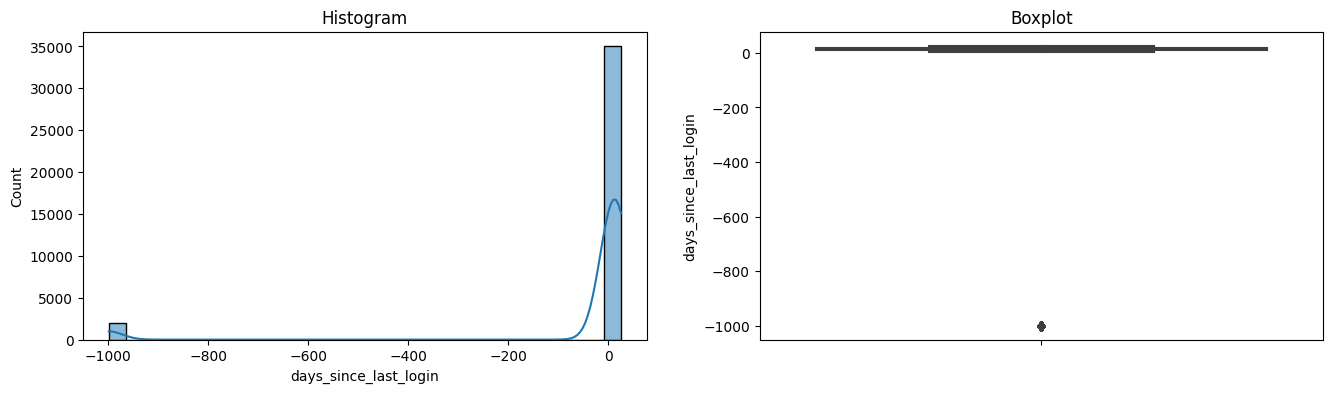

Measurement Scale : count    37010.000000
mean       -41.943502
std        228.875324
min       -999.000000
25%          8.000000
50%         12.000000
75%         16.000000
max         26.000000
Name: days_since_last_login, dtype: float64
Mode : 0    12
Name: days_since_last_login, dtype: int64
Skew : -3.940157068269968


In [22]:
# Check the column 'days_since_last_login'
diagnostic_plots1(df['days_since_last_login'])

In [23]:
# Define outliers boundaries, the distribution not normal using 1,5 * IQR
find_skewed_boundaries(df,'days_since_last_login',1.5)

Total data : 37010
Total outliers : 0
Total outliers : 2001
% Outliers upper: 0.0
% Outliers lower: 5.406646852202108


(28.0, -4.0)

Berdasarkan pengamatan terlihat bahwa distribusi datanya sangat miring kiring ke kiri. Dan berdasarkan batasan outliers menggunakan 1,5 x IQR jumlah data yang outliers cukup besar, lebih dari 5,4%.

Nilai negatif sebenarnya tidak bisa diterima bila berdasarkan definisi columns yaitu jumlah hari semenjak terakhir login. Nilai 0 menunjukan customer login di hari yang sama dan semakin lama customer tidak login maka akan semakin besar nilai jumlah harinya. Dan tidak ada penjelasan untuk nilai negatif. Akan dicek detail untuk data yang kurang dari 0.

In [24]:
# Check colum last login in minus condition

df[df['days_since_last_login'] < 0].groupby(['days_since_last_login'])['churn_risk_score'].value_counts()

days_since_last_login  churn_risk_score
-999                   1                   1109
                       0                    892
Name: churn_risk_score, dtype: int64

In [25]:
# Check column last login negatif which the target is positif
df[(df['days_since_last_login'] < 0)&(df['churn_risk_score'] == 1)].sort_values(by='joining_date', ascending=False).head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age
31059,b679d0f04f311262,29,F,NaN,No Membership,2017-12-31,No,Gift Vouchers/Coupons,NaN,Mobile_Data,19:41:53,-999,337.88,43497.53,0.0,686.23000,Yes,Yes,Yes,Unsolved,Poor Website,1,2
14351,90e519e4c275742c,45,F,NaN,Basic Membership,2017-12-30,Yes,Without Offers,Smartphone,Fiber_Optic,21:13:16,-999,0.00,12541.05,18.0,546.09000,No,Yes,Yes,No Information Available,Too many ads,1,2
21148,b1b32bd7c4531a11,59,F,City,Basic Membership,2017-12-30,NaN,Without Offers,NaN,Wi-Fi,07:05:51,-999,0.00,30499.39,14.0,703.98000,Yes,No,No,Not Applicable,Too many ads,1,3
21896,ab540fe8ed9d8fe9,38,M,Town,Gold Membership,2017-12-29,Yes,Without Offers,Both,Mobile_Data,01:36:02,-999,507.41,24059.31,15.0,933.88951,No,Yes,No,Not Applicable,Too many ads,1,2
15844,ab0ebeb93f5ae066,64,M,Town,No Membership,2017-12-29,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,01:42:32,-999,0.00,14047.78,19.0,613.91000,Yes,No,No,Not Applicable,Too many ads,1,3


Terlihat untuk nilai minus semuanya sama dengan nilai -999 namun dibandingkan dengan target, ada yang bernilai positif dan negatif. Bila dibandingkan dengan tanggal joining_date tidak ada pattern yang khusus. 

Untuk outliers di bagian ini akan direplace berdasarkan nilai median.

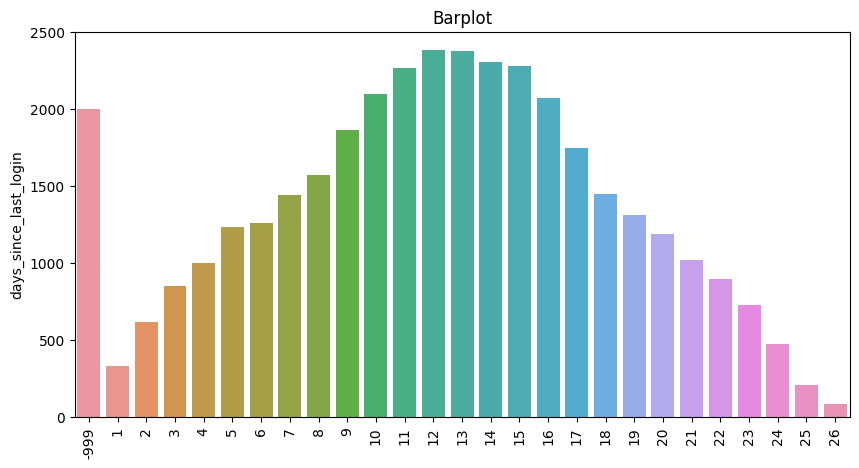

Jumlah : 
 -999    2001
 1       328
 2       615
 3       852
 4       999
 5      1234
 6      1257
 7      1442
 8      1573
 9      1863
 10     2093
 11     2262
 12     2381
 13     2373
 14     2307
 15     2279
 16     2070
 17     1747
 18     1445
 19     1309
 20     1184
 21     1015
 22      896
 23      728
 24      471
 25      204
 26       82
Name: days_since_last_login, dtype: int64
Percentage : 
 -999    5.406647
 1      0.886247
 2      1.661713
 3      2.302081
 4      2.699270
 5      3.334234
 6      3.396379
 7      3.896244
 8      4.250203
 9      5.033775
 10     5.655228
 11     6.111862
 12     6.433396
 13     6.411781
 14     6.233450
 15     6.157795
 16     5.593083
 17     4.720346
 18     3.904350
 19     3.536882
 20     3.199135
 21     2.742502
 22     2.420967
 23     1.967036
 24     1.272629
 25     0.551202
 26     0.221562
Name: days_since_last_login, dtype: float64


In [26]:
diagnostic_plots(df['days_since_last_login'])

Bila dilihat dalam rentang jumlah harinya maka bisa dikelompokan berdasarkan minggu/ week. Oleh karena itu akan dibinning dengan label sebagai berikut

1. Untuk 0- 7 hari dengan label 1
2. Untuk 8-14 hari dengan label 2
3. untuk 15- 21 hari dengan label 3
4. Untuk diatas 21 hari dengan label 4


In [27]:
# Replace values -999 
df.replace(-999,13,inplace=True)

In [28]:
# Check shape -999
df[df['days_since_last_login'] ==-999].shape

(0, 23)

In [29]:
# Create Binning days last login 
bins = [0, 7, 14, 21, 100]
labels =[1,2,3,4]
df['binned_days_last_login'] = pd.cut(df['days_since_last_login'], bins,labels=labels).astype(int)

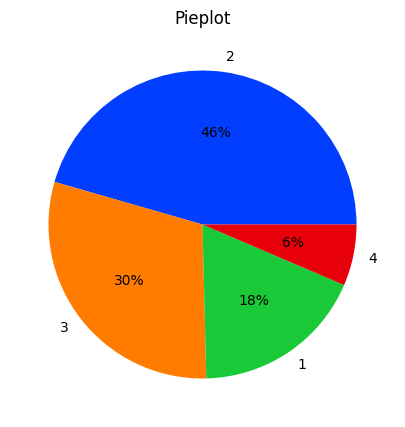

Jumlah : 
 1     6727
2    16853
3    11049
4     2381
Name: binned_days_last_login, dtype: int64
Percentage : 
 1    18.176169
2    45.536342
3    29.854093
4     6.433396
Name: binned_days_last_login, dtype: float64


In [30]:
# Check column binned_days_last_login 
diagnostic_pie(df['binned_days_last_login'])

column vs target


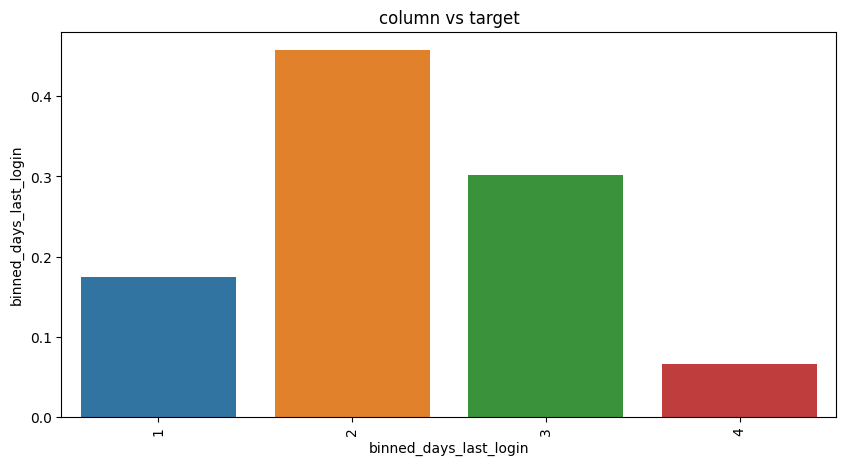

Jumlah target positif : 20018
Jumlah  : 
 binned_days_last_login
1    3499
2    9165
3    6039
4    1315
Name: binned_days_last_login, dtype: int64
Percentage : 
 binned_days_last_login
1    17.479269
2    45.783795
3    30.167849
4     6.569088
Name: binned_days_last_login, dtype: float64


In [31]:
# Check column binned_days_last_login to target
feature_target(df,'churn_risk_score',1,'binned_days_last_login')

Dari binned days last login terlihat mayoritas customer terakhir login pada rentang 8-14 hari dengan persentase 45.5%. Sedangkan untuk yang Churn juga memiliki pattern yang sama dengan populasi.

Berdasarkan hal ini, pengaruh dari jumlah hari terakhir login tidak menunjukan pengaruh signifikan customer akan churn atau tidak.  Customer yang sudah lama tidak login, atau customer yang kurang dari 1 minggu tidak login tetap ada yang churn. 

### Column avg_time_spent

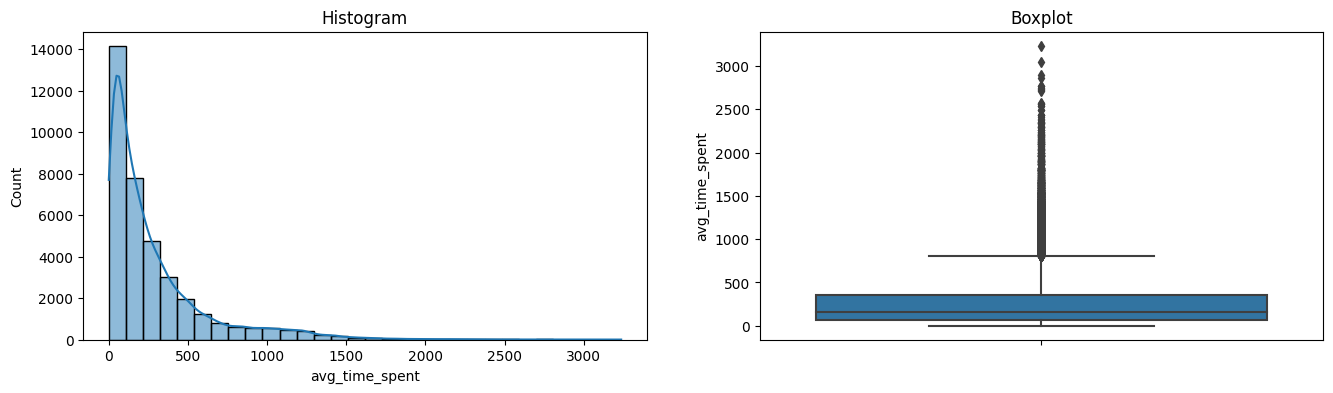

Measurement Scale : count    37010.000000
mean       279.201356
std        330.017336
min          0.000000
25%         60.122500
50%        161.770000
75%        356.525000
max       3235.578521
Name: avg_time_spent, dtype: float64
Mode : 0    0.0
Name: avg_time_spent, dtype: float64
Skew : 2.275921373726159


In [32]:
# Check the column 'avg_time_spent'
diagnostic_plots1(df['avg_time_spent'])

column vs target


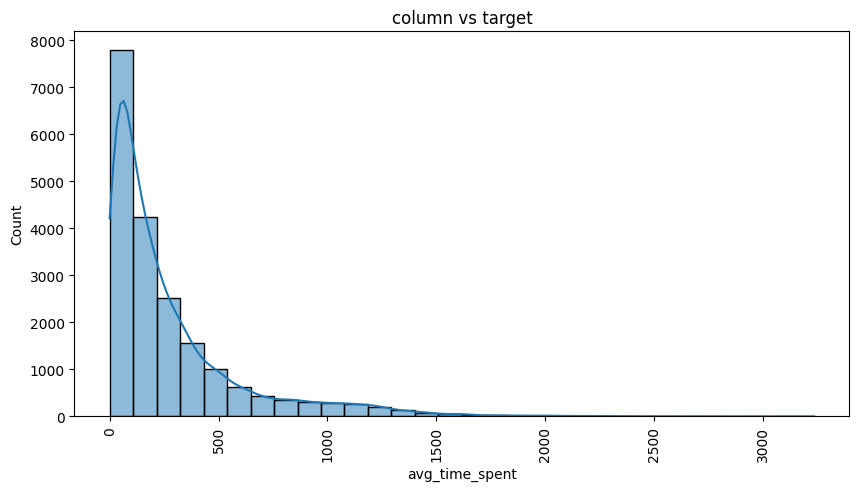

In [33]:
# Check the column 'avg_time_spent'
feature_target1(df,'churn_risk_score',1,'avg_time_spent')

In [34]:
# Define outliers boundaries, the distribution not normal using 1,5 * IQR
find_skewed_boundaries(df,'avg_time_spent',1.5)

Total data : 37010
Total outliers : 3112
Total outliers : 0
% Outliers upper: 8.408538232910026
% Outliers lower: 0.0


(801.12875, -384.48125)

In [35]:
# Define outliers boundaries, the distribution not normal using 3 * IQR ( extreme)
find_skewed_boundaries(df,'avg_time_spent',3)

Total data : 37010
Total outliers : 893
Total outliers : 0
% Outliers upper: 2.412861388813834
% Outliers lower: 0.0


(1245.7325, -829.085)

column vs target


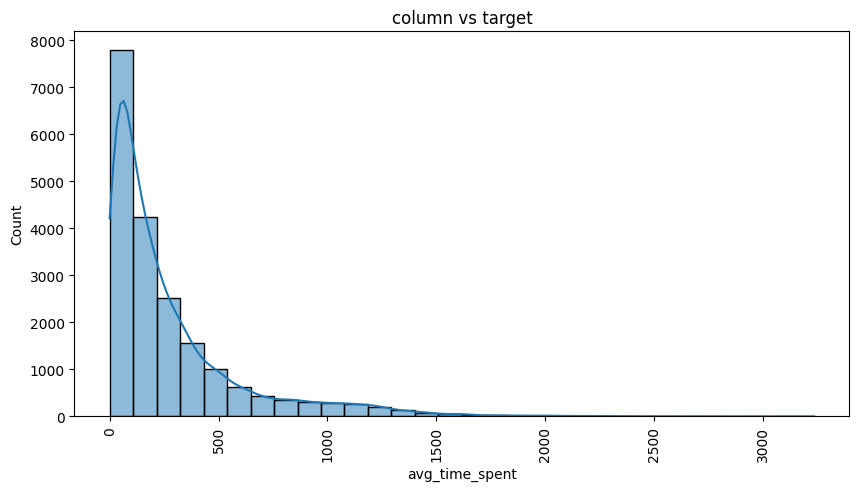

In [36]:
# Visualize column numeric continous to target (positif)
feature_target1(df,'churn_risk_score',1,'avg_time_spent')

Berdasarkan pengamatan dari histogram dan nilai skew terlihat distribusi sangat miring ke kanan. Dan outliers terlihat ada pada batas atas. Dengan menggunakan batasan 1.5* IQR jumlah outliers mencapai 8.4% sehingga dicoba menggunakan batasan ekstrim 3*IQR dan menjadi 2.4%. 

Nilai outliers disini tidak masuk akal bila average berdasarkan menit mencapai 3200 menit atau setara lebih dari 56 jam. Dan dengan nilai persentase mencapai 2.4% maka akan dilakukan trimming.

Dan berdasarkan perbandingan dengan nilai target positif ada kemiripan pola, sehingga column ini tidak memberikan korelasi signifikan

### Column avg_transaction_value

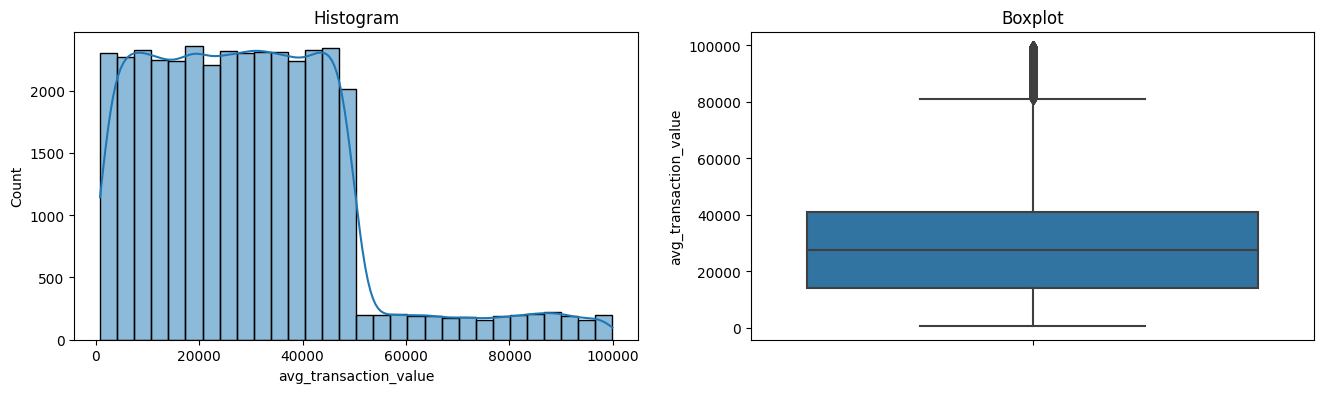

Measurement Scale : count    37010.000000
mean     29272.430216
std      19445.963492
min        800.460000
25%      14177.835000
50%      27554.485000
75%      40858.672500
max      99914.050000
Name: avg_transaction_value, dtype: float64
Mode : 0    45635.76
Name: avg_transaction_value, dtype: float64
Skew : 1.0107511716123325


In [37]:
# Check the column 'avg_transaction_value'
diagnostic_plots1(df['avg_transaction_value'])

In [38]:
# Define outliers boundaries, the distribution not normal using 1,5 * IQR
find_skewed_boundaries(df,'avg_transaction_value',1.5)

Total data : 37010
Total outliers : 1131
Total outliers : 0
% Outliers upper: 3.055930829505539
% Outliers lower: 0.0


(80879.92875, -25843.421250000007)

column vs target


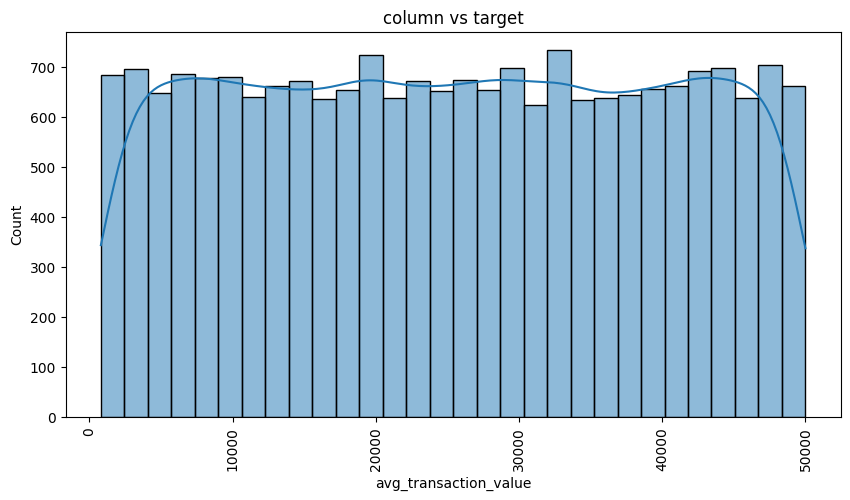

In [39]:
# Visualize column numeric continous to target (positif)
feature_target1(df,'churn_risk_score',1,'avg_transaction_value')

column vs target


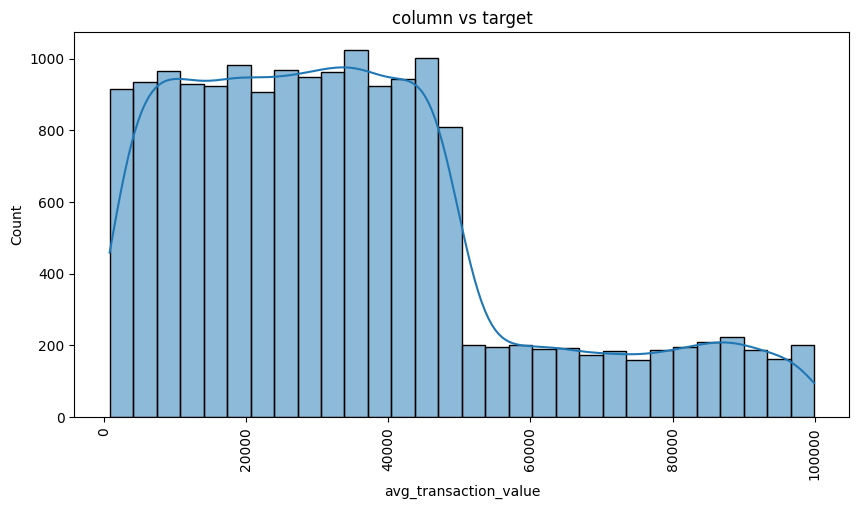

In [40]:
# Visualize column numeric continous to target (negatif)
feature_target1(df,'churn_risk_score',0,'avg_transaction_value')

Untuk column average_transaction_value berdasarkan pengamatan histogram dan nilai skew terkategori sangat miring ke kanan, dengan nilai skew lebih dari 1. 

Untuk outliers terlihat ada di batas atas, atau diatas 80.879 usd. Namun hal ini saya anggap sebagai natural outliers karena memungkinkan seseorang untuk berbelanja dalam nilai tersebut. Dan juga bisa dijadikan untuk evaluasi apakah hanya dilakukan 1 kali setelahnya churn, apabila iya bisa diduga juga bahwa customer tersebut sebenarnya melakukan fraud activity misal dengan menggunakan kartu kredit dan bekerja sama dengan seller untuk menjual barang yang sangat mahal namun sebenarnya fiktif, nanti uangnya akan ditransfer kembali ke buyer dan seller mendapat keuntungan. Atau kemungkinan fraud lainnya. 

Bila dibandingkan dengan target terlihat bahwa rata2 pembelanjaan yang churn berada pada range 800 sampai 50 ribu, hal ini menunjukan column average_transaction_value memiliki pengaruh terhadap target.

### Column avg_frequency_login_days

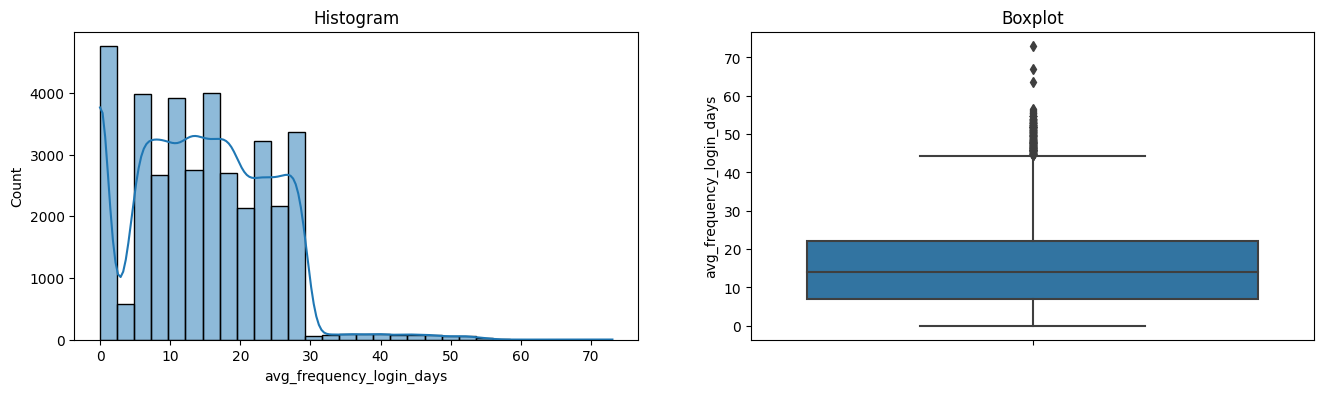

Measurement Scale : count    37010.000000
mean        14.659540
std          9.478756
min          0.000000
25%          7.000000
50%         14.000000
75%         22.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64
Mode : 0    0.0
Name: avg_frequency_login_days, dtype: float64
Skew : 0.389538185530503


In [41]:
# Check the column 'avg_frequency_login_days'
diagnostic_plots1(df['avg_frequency_login_days'])

In [42]:
# Check the outliers using normal boundaries, the distribution data not skew
normal_boundaries(df,'avg_frequency_login_days')

Total data : 37010
Total outliers : 312
Total outliers : 0
% Outliers upper: 0.8430154012429074
% Outliers lower: 0.0


(43.09580701669039, -13.77672795386127)

Terlihat berdasarkan histogram dan nilai skew distribusi datanya cukup simetris, dengan nilai skew antara 0 dengan 0.5. Bila melihat outliers berdasarkan boxplot terlihat adanya outliers diatas 45 kali /hari, namun bila menggunakan standar deviasi karena distribusinya normal batas atasnya adalah 43 kali/ hari.

Dengan jumlah outliers sebanyak 312 data dibandingkan dengan keseluruhan data, persentasenya sangat kecil. kurang dari 1 %. Meskipun dapat langsung ditrimming perlu dilihat apakah memang karena kesalahan sistem atau natural outliers.

Untuk frequency login akan dilakukan binning dibagi per 10 dalam setiap rentangnya. Untuk melihat patternya lebih jelas.


In [43]:
# Create Binning frequency login
bins = [-1, 10, 20, 30, 40, 50, 100]
labels =[1,2,3,4,6,7]
df['binned_frequency_login'] = pd.cut(df['avg_frequency_login_days'], bins,labels=labels).astype(float)

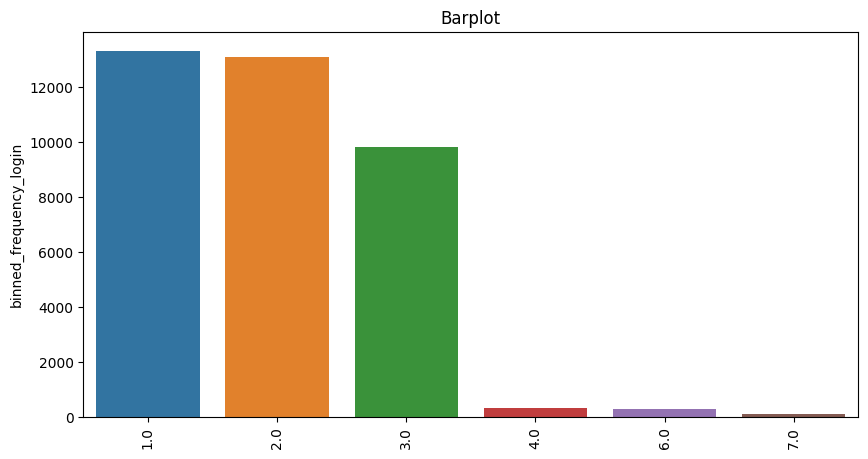

Jumlah : 
 1.0    13325
2.0    13104
3.0     9836
4.0      328
6.0      310
7.0      107
Name: binned_frequency_login, dtype: int64
Percentage : 
 1.0    36.003783
2.0    35.406647
3.0    26.576601
4.0     0.886247
6.0     0.837611
7.0     0.289111
Name: binned_frequency_login, dtype: float64


In [44]:
# Check column binned_frequency_login 
diagnostic_plots(df['binned_frequency_login'])

column vs target


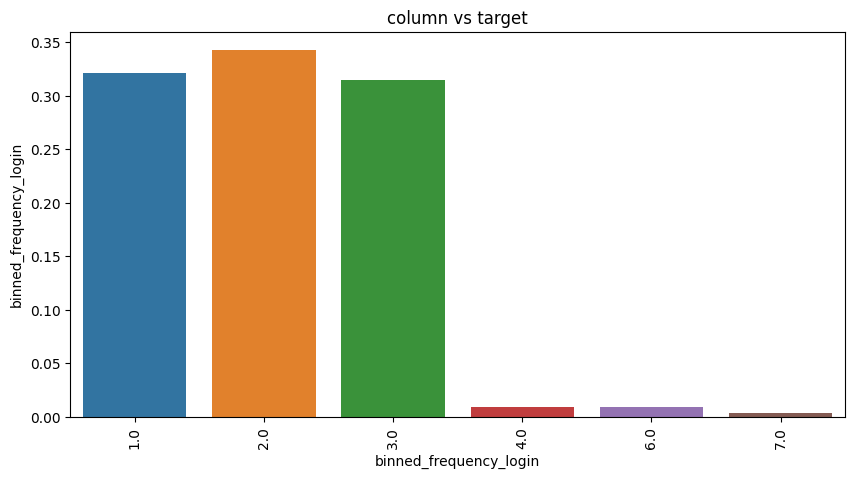

Jumlah target positif : 20018
Jumlah  : 
 binned_frequency_login
1.0    6425
2.0    6862
3.0    6304
4.0     179
6.0     183
7.0      65
Name: binned_frequency_login, dtype: int64
Percentage : 
 binned_frequency_login
1.0    32.096113
2.0    34.279149
3.0    31.491658
4.0     0.894195
6.0     0.914177
7.0     0.324708
Name: binned_frequency_login, dtype: float64


In [45]:
# Check column binned_frequency_login to target
feature_target(df,'churn_risk_score',1,'binned_frequency_login')

Berdasarkan pengamatan jumlah frequency login terlihat mayoritas 11-20 kali login dengan persentase mencapai 35.4% dan untuk login 21-30 kali persentase nya 26,57%. Dibandingkan dengan data churn, terlihat ada pattern semakin tinggi frequency loginnya semakin tinggi juga churnnya, dengan persentase kelompok 3 sebesar 31.5% dari keseluruhan data yang churn. 

In [46]:
# Check detail the outliers
df[df['avg_frequency_login_days']>43].sort_values(by='avg_frequency_login_days',ascending=True)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
9986,aeea8680ba431826,14,F,NaN,No Membership,2016-08-09,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,02:44:17,2,336.07,44029.99,43.077141,685.870000,No,Yes,Yes,Unsolved,Poor Website,1,1,1,6.0
5852,9054f315f4978e54,33,M,Village,No Membership,2016-06-16,Yes,Without Offers,Both,Mobile_Data,14:22:18,9,667.20,13538.37,43.118080,328.796166,Yes,Yes,Yes,Solved,Poor Website,1,2,2,6.0
14223,b1d0d140d5b383fb,44,M,City,Basic Membership,2015-03-02,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,14:08:40,5,118.09,34220.71,43.171992,585.110000,No,Yes,No,Not Applicable,Poor Customer Service,1,2,1,6.0
13116,b89fd11def574fda,45,M,NaN,Basic Membership,2016-04-18,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,19:50:25,18,43.22,27114.64,43.208369,232.404652,No,Yes,Yes,Unsolved,Poor Product Quality,1,2,3,6.0
6127,a33e72950b1a77ae,47,M,Town,Basic Membership,2015-02-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,12:24:16,6,31.63,2538.71,43.231578,661.530000,No,Yes,Yes,Solved in Follow-up,Too many ads,1,3,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13714,a47973f24d7275d0,22,F,Town,No Membership,2017-05-19,Yes,Without Offers,Both,Fiber_Optic,08:31:39,3,981.98,33877.40,56.161979,633.310000,No,Yes,No,Not Applicable,Too many ads,1,1,1,7.0
25215,8163b031b740d584,57,F,NaN,Basic Membership,2016-08-17,No,Without Offers,Desktop,Mobile_Data,11:38:46,8,147.02,38895.97,56.538478,520.840000,Yes,No,No,Not Applicable,Too many ads,1,3,2,7.0
168,bf490feb931a4627,11,F,Village,Silver Membership,2017-07-05,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,05:15:27,5,114.38,35493.36,63.523537,622.530000,No,Yes,Yes,No Information Available,Poor Website,1,1,1,7.0
36856,b8d664d8cdbd37b5,20,M,City,Premium Membership,2017-11-17,No,Without Offers,NaN,Mobile_Data,06:28:05,5,372.09,68641.20,67.062422,761.700000,No,Yes,Yes,Unsolved,Products always in Stock,0,1,1,7.0


<Axes: xlabel='avg_frequency_login_days', ylabel='avg_time_spent'>

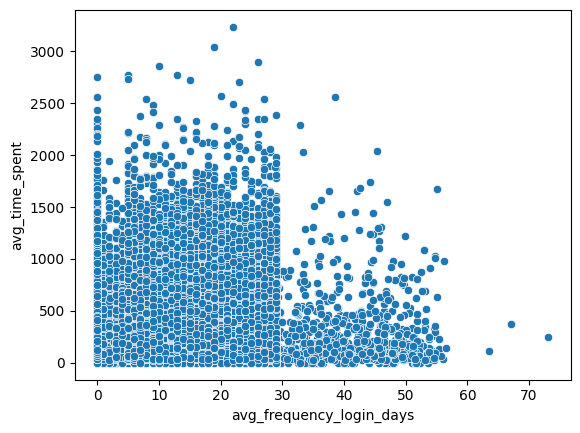

In [47]:
# Visualize with scatterplot
sns.scatterplot(data=df, x="avg_frequency_login_days", y="avg_time_spent")

Berdasarkan pengamatan dari frequensi login untuk melihat apakah data outliersnya natural atau tidak, maka kategori outliersnya masih natural karena dari scatter plot dibandingkan avg_time_spent berbanding positif dimana saat frequencynya tinggi avg_time_spentnya juga meningkat.

### Column points_in_wallet

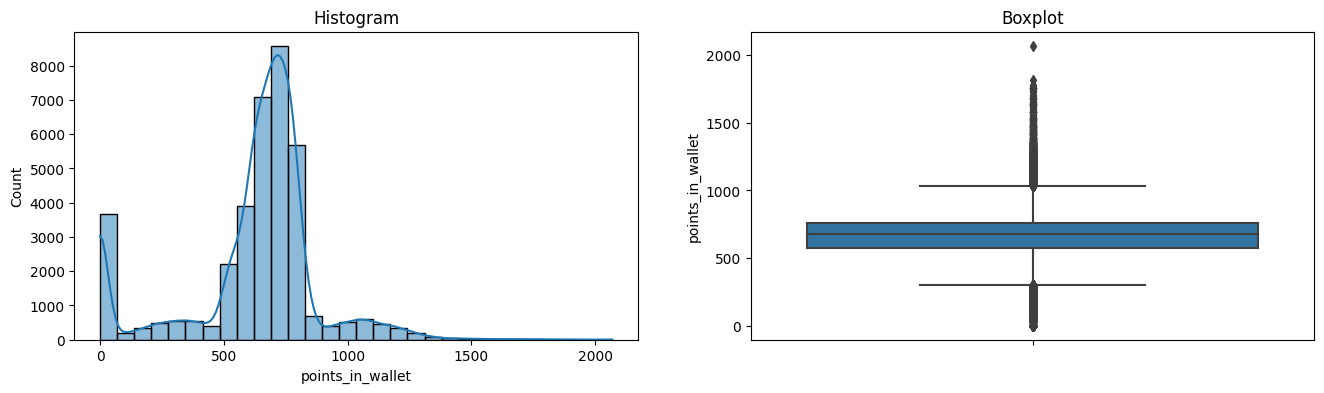

Measurement Scale : count    37010.000000
mean       623.590885
std        270.218956
min          0.000000
25%        574.220000
50%        680.400000
75%        756.990000
max       2069.069761
Name: points_in_wallet, dtype: float64
Mode : 0    0.0
Name: points_in_wallet, dtype: float64
Skew : -0.7738913518208214


In [48]:
# Check the column 'points_in_wallet'
diagnostic_plots1(df['points_in_wallet'])

In [49]:
# Define outliers boundaries, the distribution not normal using 1,5 * IQR
find_skewed_boundaries(df,'points_in_wallet',1.5)

Total data : 37010
Total outliers : 1825
Total outliers : 4867
% Outliers upper: 4.9310997027830314
% Outliers lower: 13.150499864901377


(1031.145, 300.06500000000005)

In [50]:
# Define outliers boundaries, the distribution not normal using 3 * IQR
find_skewed_boundaries(df,'points_in_wallet',3)

Total data : 37010
Total outliers : 202
Total outliers : 3594
% Outliers upper: 0.5457984328559848
% Outliers lower: 9.710888948932721


(1305.3, 25.910000000000082)

Berdasarkan pengamatan untuk column points_in_walet terlihat distibusinya cukup miring ke kiri dengan nilai skew diantara - 0,5 sampai dengan -1. Berdasarkan oxplot juga terlihat adanya outliers, dimana batasan yang digunakan adalah batasan ekstrim 3x IQR namun tetap jumlahnya lebih dari 5%. Dan bila dicek pada kondisi real ini, nilai points diluar batas outliers adalah natural. Dimana seseorang bisa memiliki nilai poins 0 karena sudah habis digunakan atau ada juga customer yang sengaja mengumpulkan poinnya dan tidak digunakan. 

Berdasarkan hal- hal tersebut maka untuk outliers ini dianggap natural dan tidak akan dilakukan handling.

## 4.2 - Check Columns categoric

Dari pengamatan diawal berdasarkan check dataset over all diketahui ada 4 columns categoric yang missing values. Untuk detailnya akan dicek permasing- masing column.

Berikut columns missing values 'gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', dan 'medium_of_operation

In [51]:
df.head(1)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,2,1,1.0


### Column Gender

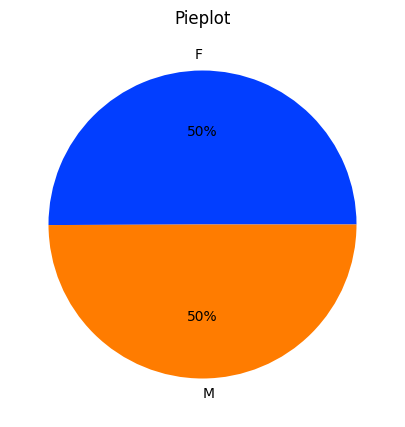

Jumlah : 
 F    18497
M    18454
Name: gender, dtype: int64
Percentage : 
 F    49.978384
M    49.862199
Name: gender, dtype: float64


In [52]:
# Visualize column with barplot
diagnostic_pie(df['gender'])

column vs target


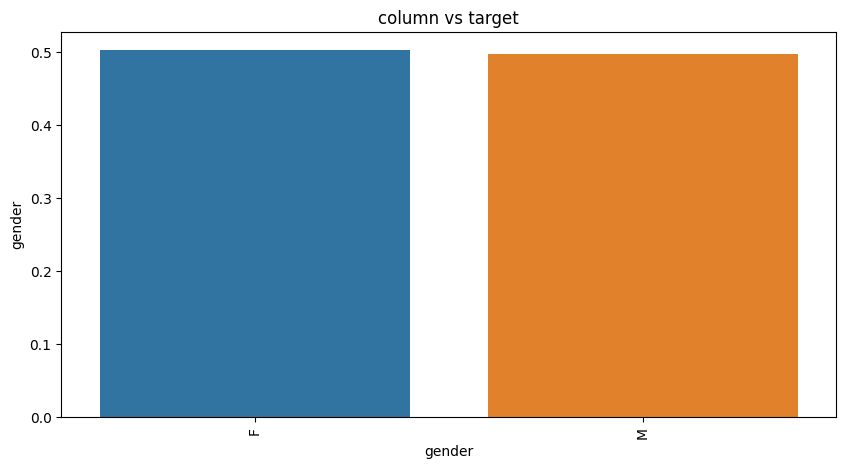

Jumlah target positif : 20018
Jumlah  : 
 gender
F    10051
M     9938
Name: gender, dtype: int64
Percentage : 
 gender
F    50.209811
M    49.645319
Name: gender, dtype: float64


In [53]:
# Visualize column gender to target
feature_target(df,'churn_risk_score',1,'gender')

Berdasarkan pengamatan column gender terlihat proporsi Female dan Male memiliki persentase yang seimbang 50% : 50%, dan bila dibandingkan dengan target poitif juga memiliki kemiripan pola, meski bila dilihat secara detail untuk female lebih besar 0,2% dibanding male.

In [54]:
# check missing values columns gender
print('jumlah missing values', df['gender'].isnull().sum())
print('% missing values', df['gender'].isnull().sum()/len(df)*100)

jumlah missing values 59
% missing values 0.1594163739529857


In [55]:
# Check detail missing values
df[df['gender'].isna()].head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
22,be55c26b06eeb561,54,NaN,City,Basic Membership,2017-03-18,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,12:34:37,13,156.07,32463.61,16.0,639.820000,Yes,No,Yes,No Information Available,Poor Product Quality,1,3,2,2.0
145,a159641a5f8deac9,47,NaN,Town,Silver Membership,2015-04-20,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,02:55:43,13,262.65,35934.73,19.0,784.300000,Yes,Yes,Yes,Solved,Poor Website,0,3,2,2.0
728,b85b3149c460cd02,40,NaN,City,Silver Membership,2017-01-01,No,Without Offers,Desktop,Mobile_Data,10:11:30,14,333.25,21440.09,18.0,749.310000,Yes,No,No,Not Applicable,Products always in Stock,0,2,2,2.0
2304,94070fc001e5d60b,23,NaN,Village,Premium Membership,2017-10-28,Yes,Gift Vouchers/Coupons,NaN,Wi-Fi,10:18:06,17,93.88,38875.53,22.0,1181.889841,Yes,No,Yes,Unsolved,Poor Website,0,1,3,3.0
2586,8f54a6a4f89f7305,41,NaN,City,No Membership,2016-11-05,Yes,Without Offers,NaN,Fiber_Optic,14:28:42,13,52.11,28298.29,6.0,548.630000,No,Yes,Yes,Unsolved,Poor Product Quality,1,2,2,1.0
3926,8ace27a9d93861b0,13,NaN,Town,No Membership,2016-09-18,NaN,Credit/Debit Card Offers,Smartphone,Fiber_Optic,10:25:14,15,549.90,15737.81,9.0,573.000000,No,Yes,Yes,Unsolved,Too many ads,1,1,3,1.0
4023,9518edceea074d43,26,NaN,City,Basic Membership,2017-05-07,NaN,Without Offers,Smartphone,Wi-Fi,20:39:43,13,259.82,21380.00,0.0,0.000000,No,Yes,No,Not Applicable,Poor Website,1,2,2,1.0
4328,8c8af015fb0c05cd,52,NaN,Town,Gold Membership,2017-08-03,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,07:16:18,23,128.28,15277.33,28.0,787.840000,Yes,No,Yes,Solved,Poor Customer Service,0,3,4,3.0
5912,8d67e181f8dac02a,53,NaN,Village,Basic Membership,2015-09-13,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,01:57:21,8,650.07,26235.35,0.0,532.600000,No,Yes,Yes,No Information Available,No reason specified,1,3,2,1.0
5979,b0eff1eecbf9eb56,18,NaN,NaN,Platinum Membership,2015-12-15,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,08:25:44,17,221.57,12808.70,7.0,0.000000,Yes,No,Yes,Solved in Follow-up,No reason specified,0,1,3,1.0


Berdasarkan pengamatan terdapat 59 data yang missing values atau setara dengan 0.16% dari keseluruhan data dan jenis missing values di column gender dapat dicategorikan sebagai MCAR, karena tidak dapat diketahui informasi dari kolom lain dan tidak ada pattern yang membuat missing. 

Misal nama dan berdasarkan jenis yang produk yang dibeli, bila diketahui bisa memberikan kemudahan untuk memprediksi gender yang missing. Ataupun pertanyaan yang menyangkut hal sensitif sehingga terlihat ada pattern berdasarkan gender apa yang missing.

Untuk missing values di column gender tidak akan ditrimming namun akan diinput secara random karena melihat pattern dari dataset yang seimbang antara Female dan Male.  

### Column Region_category

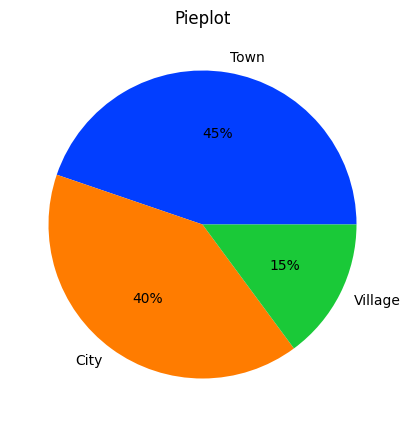

Jumlah : 
 City       12744
Town       14135
Village     4700
Name: region_category, dtype: int64
Percentage : 
 City       34.433937
Town       38.192380
Village    12.699270
Name: region_category, dtype: float64


In [56]:
# Visualize column region
diagnostic_pie(df['region_category'])

column vs target


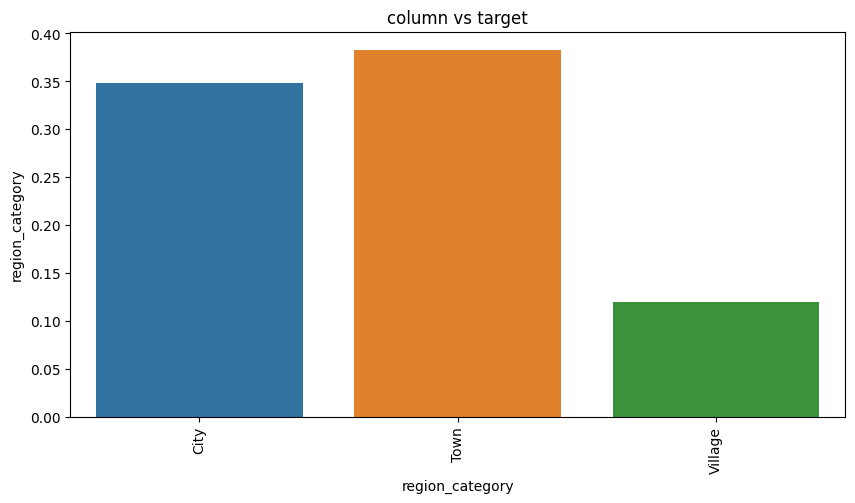

Jumlah target positif : 20018
Jumlah  : 
 region_category
City       6971
Town       7661
Village    2407
Name: region_category, dtype: int64
Percentage : 
 region_category
City       34.823659
Town       38.270556
Village    12.024178
Name: region_category, dtype: float64


In [57]:
# Visualize column region to target
feature_target(df,'churn_risk_score',1,'region_category')

Berdasarkan pengamatan dari pie plot terlihat dari 3 wilayah region, customer terbanyak ada pada Town, kemudian City, dan terakhir Village. Dibandingkan dengan target positif juga terlihat kesamaan pattern. 

Selanjutnya akan dicek untuk missing valuesnya untuk menentukan handling yang akan dilakukan. 

In [58]:
# Check detail missing values column region category
print('jumlah missing values', df['region_category'].isnull().sum())
print('% missing values', df['region_category'].isnull().sum()/len(df)*100)
print('jumlah missing value pada target (+)', df[(df['region_category'].isna()) & (df['churn_risk_score']==1)].shape[0])
print('jumlah missing value pada target (-)', df[(df['region_category'].isna()) & (df['churn_risk_score']==0)].shape[0])

jumlah missing values 5431
% missing values 14.674412320994326
jumlah missing value pada target (+) 2979
jumlah missing value pada target (-) 2452


In [59]:
 # Check detail missval region_category
 df[df['region_category'].isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1,2,1,1.0
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1,3,2,2.0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.30,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1,2,2,3.0
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,08:29:45,2,39.85,24087.96,10.0,656.380000,Yes,No,No,Not Applicable,No reason specified,1,3,1,1.0
13,8a2770c75d7ca0f3,33,M,NaN,No Membership,2016-01-25,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,21:51:51,12,142.85,9854.95,15.0,1357.366572,No,Yes,No,Not Applicable,Poor Website,1,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,9814f1d3a7bc587c,12,F,NaN,Basic Membership,2017-02-17,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,10:27:41,18,41.10,37677.31,9.0,561.200000,Yes,No,No,Not Applicable,No reason specified,1,1,3,1.0
36988,9afb485363a32b12,45,F,NaN,Gold Membership,2016-02-20,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,10:09:04,21,30.79,43048.44,12.0,689.440000,No,Yes,No,Not Applicable,Poor Website,1,2,3,2.0
36991,a6f0555c497dad8c,50,M,NaN,Silver Membership,2017-03-11,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,04:04:06,10,31.39,41364.87,10.0,744.750000,Yes,No,Yes,No Information Available,Too many ads,0,3,2,1.0
36996,87b2cfb9c6df3e13,63,F,NaN,Gold Membership,2015-09-10,Yes,Without Offers,Smartphone,Mobile_Data,00:50:55,7,105.90,21985.81,27.0,603.350000,No,Yes,Yes,Solved,Too many ads,1,3,1,3.0


Berdasarkan pengamatan missing values di column region, jenis missingnya juga termasuk MCAR. Namun dengan jumlah yang sangat banyak maka handlingnya akan menggunakan imputasi dengan variable terbanyak (town).

### Column membership_category

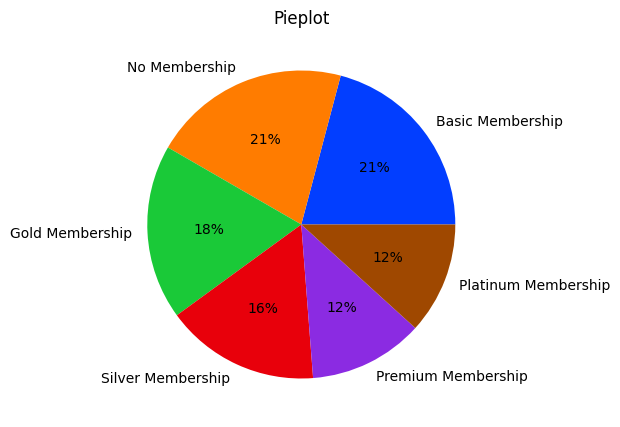

Jumlah : 
 Basic Membership       7727
Gold Membership        6799
No Membership          7693
Platinum Membership    4342
Premium Membership     4458
Silver Membership      5991
Name: membership_category, dtype: int64
Percentage : 
 Basic Membership       20.878141
Gold Membership        18.370711
No Membership          20.786274
Platinum Membership    11.731964
Premium Membership     12.045393
Silver Membership      16.187517
Name: membership_category, dtype: float64


In [60]:
# Visualize column with barplot
diagnostic_pie(df['membership_category'])

column vs target


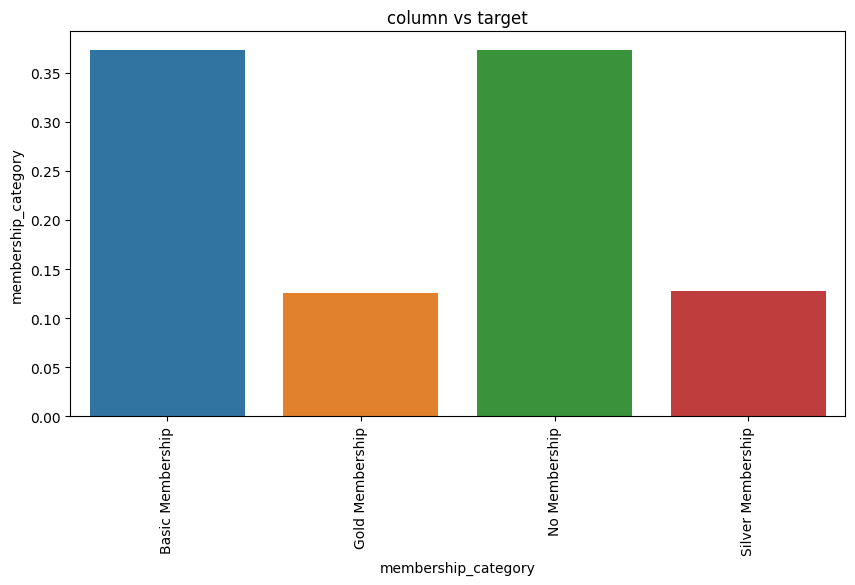

Jumlah target positif : 20018
Jumlah  : 
 membership_category
Basic Membership     7476
Gold Membership      2514
No Membership        7467
Silver Membership    2561
Name: membership_category, dtype: int64
Percentage : 
 membership_category
Basic Membership     37.346388
Gold Membership      12.558697
No Membership        37.301429
Silver Membership    12.793486
Name: membership_category, dtype: float64


In [61]:
# Visualize column membership_category to target
feature_target(df,'churn_risk_score',1,'membership_category')

Untuk column membership category terlihat mayaoritas customernya basic membership dan non membership, dengan persentase sama- sama 21%. Dan categorynya sendiri terbagi menjadi 6 variable.

Sedangkan saat dibandingkan dengan target positif, untuk dua variable platinum dan premium membership tidak ada yang churn. Hal ini menunujukan membership category mempunyai pengaruh terhadap target.


### Column joining_date

In [62]:
# Check range of joining_date
df.sort_values(by='joining_date', ascending=True)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
1124,afa2095e1b800100,47,M,City,No Membership,2015-01-01,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,00:49:40,16,34.01,15645.00,28.0,0.000000,Yes,No,Yes,Unsolved,Poor Product Quality,1,3,3,3.0
14446,a6b5ca4f35868dec,49,M,NaN,Silver Membership,2015-01-01,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,20:35:29,9,175.50,32055.67,28.0,514.303915,No,Yes,No,Not Applicable,No reason specified,1,3,2,3.0
24989,a699e8a023cc4091,26,F,Town,No Membership,2015-01-01,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,20:06:19,13,104.29,40063.88,17.0,1481.133007,No,Yes,Yes,Solved in Follow-up,No reason specified,1,2,2,2.0
14846,b310c5b55a3fa40e,46,F,City,Basic Membership,2015-01-01,NaN,Gift Vouchers/Coupons,NaN,Fiber_Optic,08:44:21,4,121.53,41497.78,26.0,577.650000,No,Yes,No,Not Applicable,Poor Customer Service,1,3,1,3.0
22101,b6ed3a24a5d81e93,13,M,City,Premium Membership,2015-01-01,No,Without Offers,Desktop,Fiber_Optic,17:35:08,20,145.57,12081.01,18.0,0.000000,No,Yes,Yes,Unsolved,Poor Customer Service,0,1,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,b4e75a3f45cd80b4,52,M,NaN,Basic Membership,2017-12-31,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,00:21:16,16,127.51,27490.93,16.0,665.350000,Yes,No,Yes,Solved in Follow-up,Too many ads,1,3,3,2.0
5743,86039d489420a41d,14,F,Village,No Membership,2017-12-31,NaN,Without Offers,Desktop,Wi-Fi,14:00:39,12,127.59,20154.98,21.0,682.270000,No,Yes,No,Not Applicable,No reason specified,1,1,2,3.0
15868,92ac892e0e9c52af,32,M,Town,Silver Membership,2017-12-31,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,00:18:28,14,0.00,43191.80,8.0,628.110000,Yes,No,Yes,Unsolved,No reason specified,0,2,2,1.0
6452,8848b30b8a22e8a4,25,F,City,Gold Membership,2017-12-31,NaN,Credit/Debit Card Offers,Desktop,Wi-Fi,14:31:58,14,733.67,25830.93,14.0,615.020000,No,Yes,No,Not Applicable,Poor Website,1,1,2,2.0


In [63]:
# Check the last joining date
df[df['joining_date']== '2017-12-31'].sort_values(by='days_since_last_login', ascending=False).head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
9260,93ee0fa3634b1d65,36,F,Town,Basic Membership,2017-12-31,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,10:01:05,21,357.87,20235.86,6.0,594.08,Yes,Yes,No,Not Applicable,Poor Product Quality,1,2,3,1.0
9538,a64f32f2a2b7e548,45,F,City,No Membership,2017-12-31,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,08:55:45,21,216.76,35879.38,27.0,636.55,No,Yes,Yes,Solved in Follow-up,Poor Customer Service,1,2,3,3.0
18520,aa477ca3eadbd9c8,35,F,Town,Gold Membership,2017-12-31,NaN,Credit/Debit Card Offers,NaN,Wi-Fi,18:03:28,20,506.80,9994.69,13.0,718.29,Yes,Yes,Yes,Solved in Follow-up,Poor Product Quality,1,2,3,2.0
27226,b8020c36688da323,51,F,City,Gold Membership,2017-12-31,Yes,NaN,Smartphone,Fiber_Optic,23:40:09,19,83.82,5270.58,0.0,758.71,No,Yes,Yes,Solved in Follow-up,Too many ads,0,3,3,1.0
13223,8e74cdcc501d891c,14,F,Town,Gold Membership,2017-12-31,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,11:22:22,18,33.07,13123.27,12.0,691.87,Yes,No,No,Not Applicable,Poor Customer Service,1,1,3,2.0


Dapat diketahui berdasarkan range tanggal joining date, data customer dari awal tahun 2015 sampai dengan akhir 2017. Bila dicek berdasarkan last login dibandingkan dengan data terakhir join maka data ini kemungkinan diambil di Akhir januari 2018

### Column joined_through_referral

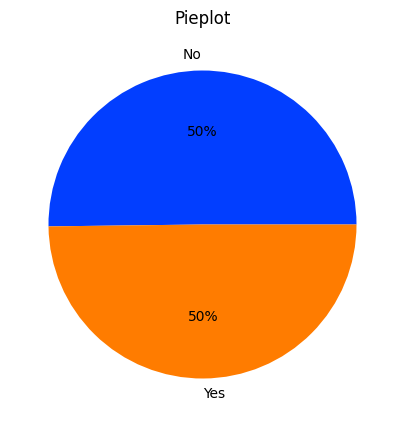

Jumlah : 
 No     15846
Yes    15722
Name: joined_through_referral, dtype: int64
Percentage : 
 No     42.815455
Yes    42.480411
Name: joined_through_referral, dtype: float64


In [64]:
# Visualize column with barplot
diagnostic_pie(df['joined_through_referral'])

column vs target


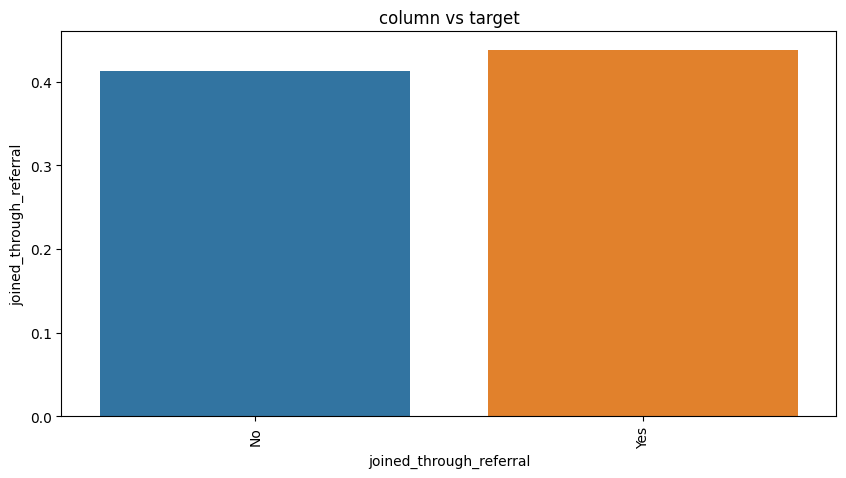

Jumlah target positif : 20018
Jumlah  : 
 joined_through_referral
No     8265
Yes    8766
Name: joined_through_referral, dtype: int64
Percentage : 
 joined_through_referral
No     41.287841
Yes    43.790588
Name: joined_through_referral, dtype: float64


In [65]:
# Visualize column joined_through_referral to target
feature_target(df,'churn_risk_score',1,'joined_through_referral')

Berdasarkan pengamatan pada column joined through referral terlihat perbandingannya balance atau 50% antara menggunakan dan tidak menggunakan referal code. Namun bila dilihat berdasarkan target positif, customer yang churn terlihat lebih banyak yang menggunakan referal code.

Column ini juga termasuk column dengan missing value sehingga akan langsung dicek jenis missing valuesnya.

In [66]:
# Check detail missing values column joined_through_referral
print('jumlah missing values', df['joined_through_referral'].isnull().sum())
print('% missing values', df['joined_through_referral'].isnull().sum()/len(df)*100)
print('jumlah missing value pada target (+)', df[(df['joined_through_referral'].isna()) & (df['churn_risk_score']==1)].shape[0])
print('jumlah missing value pada target (-)', df[(df['joined_through_referral'].isna()) & (df['churn_risk_score']==0)].shape[0])

jumlah missing values 5442
% missing values 14.704134017833018
jumlah missing value pada target (+) 2987
jumlah missing value pada target (-) 2455


In [67]:
# Check data missing values
df[df['joined_through_referral'].isna()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,2,2,1.0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,3,2,1.0
12,8578cd74b0eb2c83,24,F,Village,Silver Membership,2016-04-05,NaN,Without Offers,Smartphone,Mobile_Data,10:04:56,14,160.270000,49607.97,20.0,0.00,No,Yes,Yes,Solved,Too many ads,1,1,2,2.0
16,b1807a7cb1c66671,63,M,NaN,Silver Membership,2015-06-13,NaN,Credit/Debit Card Offers,Smartphone,Mobile_Data,01:48:40,9,92.070000,21395.38,26.0,667.71,No,Yes,No,Not Applicable,Too many ads,1,3,2,3.0
19,a19f84a19e38e20c,40,M,City,No Membership,2015-05-05,NaN,Without Offers,Desktop,Wi-Fi,23:36:26,9,119.120000,4384.76,8.0,0.00,Yes,No,Yes,Solved,Too many ads,0,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36998,bbb3a45b217bd6d9,18,F,Town,Premium Membership,2016-05-29,NaN,Without Offers,Smartphone,Mobile_Data,06:18:58,9,401.110000,61048.95,9.0,787.61,Yes,Yes,No,Not Applicable,User Friendly Website,0,1,2,1.0
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1,2,3,3.0
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1,3,2,3.0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0,2,3,1.0


Berdasarkan pengamatan missing value di column joined through referal, missing values disini juga completely at random. Tidak ada pattern yang menyebabkan missingnya. Nilainya pun besar dengan 14% dari keseluruhan data. Untuk penanganan akan menggunakan imputasi berdarkan frekuensi variable terbanyak.

### Column preferred_offer_types

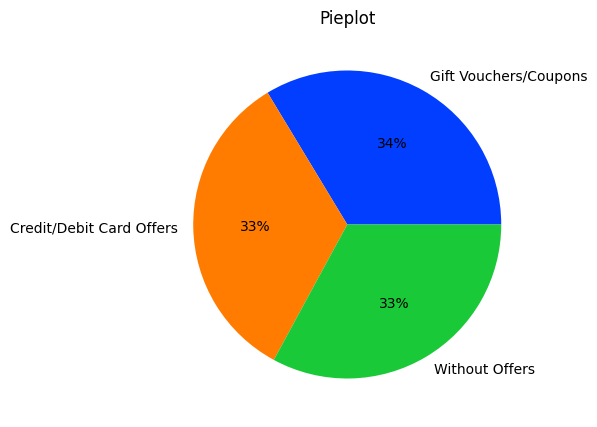

Jumlah : 
 Credit/Debit Card Offers    12281
Gift Vouchers/Coupons       12357
Without Offers              12084
Name: preferred_offer_types, dtype: int64
Percentage : 
 Credit/Debit Card Offers    33.182924
Gift Vouchers/Coupons       33.388273
Without Offers              32.650635
Name: preferred_offer_types, dtype: float64


In [68]:
# Visualize column with barplot
diagnostic_pie(df['preferred_offer_types'])

column vs target


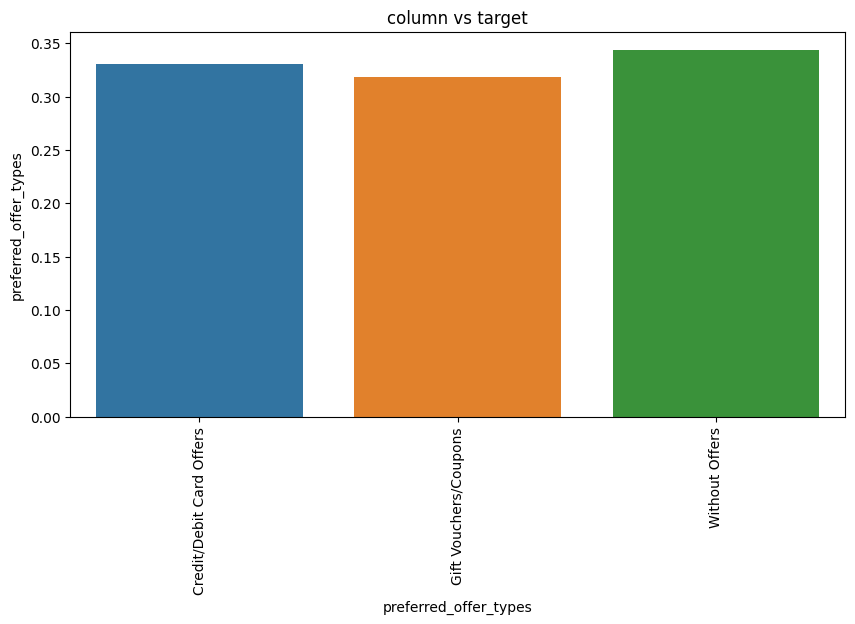

Jumlah target positif : 20018
Jumlah  : 
 preferred_offer_types
Credit/Debit Card Offers    6611
Gift Vouchers/Coupons       6372
Without Offers              6878
Name: preferred_offer_types, dtype: int64
Percentage : 
 preferred_offer_types
Credit/Debit Card Offers    33.025277
Gift Vouchers/Coupons       31.831352
Without Offers              34.359077
Name: preferred_offer_types, dtype: float64


In [69]:
# Visualize column preferred_offer_types to target
feature_target(df,'churn_risk_score',1,'preferred_offer_types')

Berdasarkan pengamatan column preferred offer types, dari 3 variable memiliki proporsi yang hampir sama antar variablenya, dengan persentase tertinggi pada variable gift vouchers namun bila dibandingkan dengan target positif nilai tertinggi ada pada without offers. Ini juga menunjukan adanya corelasi dengan target.

Untuk missing values akan dilakukan pengecekan lebih detail.

In [70]:
# Check detail missing values column preferred_offer_types
print('jumlah missing values', df['preferred_offer_types'].isnull().sum())
print('% missing values', df['preferred_offer_types'].isnull().sum()/len(df)*100)
print('jumlah missing value pada target (+)', df[(df['preferred_offer_types'].isna()) & (df['churn_risk_score']==1)].shape[0])
print('jumlah missing value pada target (-)', df[(df['preferred_offer_types'].isna()) & (df['churn_risk_score']==0)].shape[0])

jumlah missing values 288
% missing values 0.7781680626857606
jumlah missing value pada target (+) 157
jumlah missing value pada target (-) 131


In [71]:
# Check data missing values
df[df['preferred_offer_types'].isna()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
90,83f7dd56ba3a0464,52,F,NaN,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,23:32:55,13,68.820000,28467.12,0.00000,0.000000,Yes,No,No,Not Applicable,Poor Customer Service,1,3,2,1.0
164,8770519c75c4b2d3,58,M,City,Silver Membership,2017-07-07,No,NaN,NaN,Mobile_Data,00:30:41,13,173.870000,1045.85,24.00000,638.630000,No,Yes,No,Not Applicable,Too many ads,1,3,2,3.0
171,b42a19688ed2c20b,47,F,Town,No Membership,2017-07-20,No,NaN,Smartphone,Fiber_Optic,01:29:53,13,1033.552633,45197.88,7.00000,626.870000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1,3,2,1.0
246,88c4c93b81513e57,63,M,City,Gold Membership,2017-08-19,Yes,NaN,Smartphone,Fiber_Optic,05:06:12,5,438.260000,21627.21,13.00000,784.750000,Yes,No,Yes,No Information Available,Poor Website,0,3,1,2.0
254,a0ce1bae55f27bae,10,M,Town,Gold Membership,2016-07-22,Yes,NaN,Desktop,Fiber_Optic,04:39:49,15,869.982709,29733.41,6.00000,1216.180871,Yes,No,No,Not Applicable,Poor Website,0,1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36232,887a1d3f3ad3ff15,63,M,NaN,Basic Membership,2016-08-25,NaN,NaN,Smartphone,Wi-Fi,09:54:28,12,30.260000,26346.31,24.00000,1145.229831,No,Yes,No,Not Applicable,Poor Customer Service,1,3,2,3.0
36268,83f27ce3e567032f,56,M,Town,Gold Membership,2017-08-28,Yes,NaN,Smartphone,Mobile_Data,07:54:15,16,99.540000,47845.03,38.34557,703.770000,Yes,No,Yes,Unsolved,No reason specified,0,3,3,4.0
36545,9825def06831b1c1,16,F,Village,Basic Membership,2017-07-27,Yes,NaN,Smartphone,Mobile_Data,08:51:10,15,94.860000,32054.85,15.00000,698.610000,No,Yes,No,Not Applicable,Poor Customer Service,1,1,3,2.0
36565,851bb0bed651ee79,57,M,NaN,Basic Membership,2017-11-27,No,NaN,NaN,Wi-Fi,03:32:59,13,42.320000,5430.74,28.00000,827.597493,Yes,No,No,Not Applicable,Poor Customer Service,1,3,2,3.0


Berdasarkan pengecekan missing value, kategorinya juga termasuk MCAR dengan persentase 0.77%, kurang dari 1 % dari keseluruhan data.

### Column medium_of_operation	

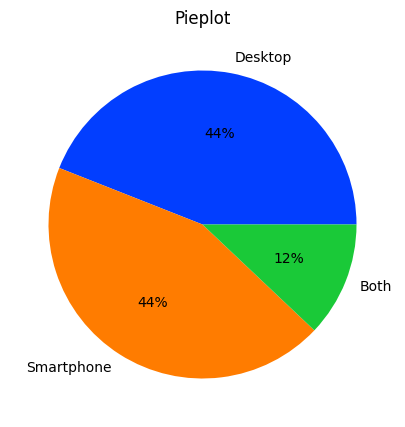

Jumlah : 
 Both           3813
Desktop       13917
Smartphone    13885
Name: medium_of_operation, dtype: int64
Percentage : 
 Both          10.302621
Desktop       37.603350
Smartphone    37.516887
Name: medium_of_operation, dtype: float64


In [72]:
# Visualize column with barplot
diagnostic_pie(df['medium_of_operation'])

column vs target


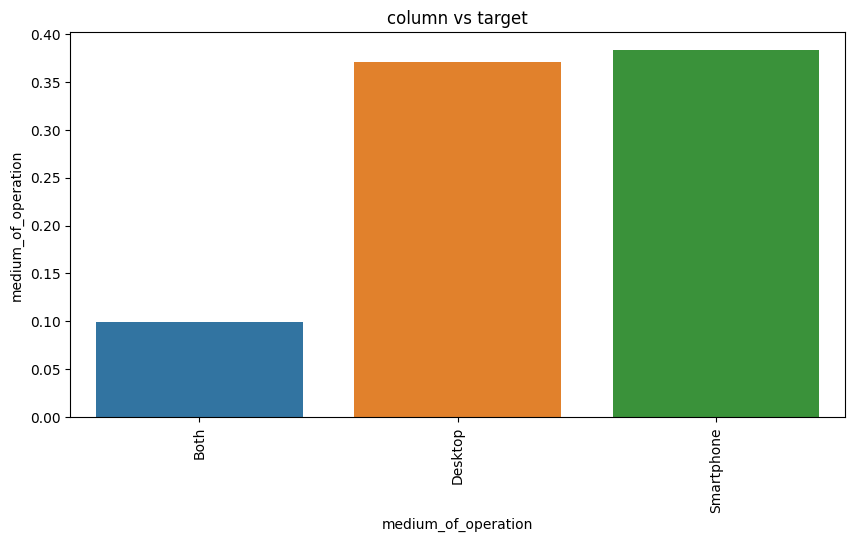

Jumlah target positif : 20018
Jumlah  : 
 medium_of_operation
Both          1983
Desktop       7418
Smartphone    7667
Name: medium_of_operation, dtype: int64
Percentage : 
 medium_of_operation
Both           9.906085
Desktop       37.056649
Smartphone    38.300530
Name: medium_of_operation, dtype: float64


In [73]:
# Visualize column medium_of_operation to target
feature_target(df,'churn_risk_score',1,'medium_of_operation')

Berdasarkan pengamatan pada column medium_of_operation. Diketahui ada 3 variable, yaitu desktop, smartphone, dan both. persentase dari smartphone dan desktop memiliki hampir kesamaan persentase yaitu 44% dan untuk both 12 %. 
Sedangkan untuk berdasarkan target positif memiliki kemiripan pola namun utnuk terbesarnya yaitu smartphone dengan persentase 38%. 

Nilai ini tidak menjadi 100 % karena adanya missing value. untuk detailnya akn dicek missing valuesnya.

In [74]:
# Check detail missing values column medium_of_operation	
print('jumlah missing values', df['medium_of_operation'].isnull().sum())
print('% missing values', df['medium_of_operation'].isnull().sum()/len(df)*100)
print('jumlah missing value pada target (+)', df[(df['medium_of_operation'].isna()) & (df['churn_risk_score']==1)].shape[0])
print('jumlah missing value pada target (-)', df[(df['medium_of_operation'].isna()) & (df['churn_risk_score']==0)].shape[0])

jumlah missing values 5395
% missing values 14.577141313158606
jumlah missing value pada target (+) 2950
jumlah missing value pada target (-) 2445


In [75]:
# Check data missing values
df[df['medium_of_operation'].isna()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,binned_age,binned_days_last_login,binned_frequency_login
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,2,1,1.0
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,2,2,1.0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0,2,3,3.0
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00,Yes,Yes,No,Not Applicable,Products always in Stock,0,3,1,2.0
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,08:29:45,2,39.850000,24087.96,10.0,656.38,Yes,No,No,Not Applicable,No reason specified,1,3,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36981,9910a08d19c267cb,60,F,NaN,Platinum Membership,2015-05-24,Yes,Without Offers,NaN,Mobile_Data,11:17:58,15,147.610000,6947.31,15.0,814.68,No,Yes,No,Not Applicable,Reasonable Price,0,3,3,2.0
36995,aef81486b7cc8c73,51,M,Village,Silver Membership,2015-06-18,No,Credit/Debit Card Offers,NaN,Fiber_Optic,18:57:57,4,254.670000,12748.24,18.0,0.00,Yes,No,Yes,Unsolved,Too many ads,0,3,1,2.0
36999,bb5eb87592709200,52,M,Town,Gold Membership,2017-03-30,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,11:47:24,13,831.490000,37021.18,25.0,751.48,No,Yes,Yes,No Information Available,Poor Website,0,3,2,3.0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0,2,3,1.0


In [76]:
df[df['medium_of_operation'].notnull()].groupby(['internet_option','medium_of_operation']).count()

user_id   age  gender  region_category  \
internet_option medium_of_operation                                           
Fiber_Optic     Both                    1254  1254    1253             1081   
                Desktop                 4573  4573    4566             3900   
                Smartphone              4677  4677    4667             4055   
Mobile_Data     Both                    1263  1263    1261             1068   
                Desktop                 4626  4626    4621             3935   
                Smartphone              4608  4608    4603             3970   
Wi-Fi           Both                    1296  1296    1295             1100   
                Desktop                 4718  4718    4710             3989   
                Smartphone              4600  4600    4594             3927   

                                     membership_category  joining_date  \
internet_option medium_of_operation                                      
Fiber_Optic     Both                                1254          1254   
                Desktop                             4573          4573   
                Smartphone                          4677          4677   
Mobile_Data     Both                                1263          1263   
                Desktop                             4626          4626   
                Smartphone                          4608          4608   
Wi-Fi           Both                                1296          1296   
                Desktop                             4718          4718   
                Smartphone                          4600          4600   

                                     joined_through_referral  \
internet_option medium_of_operation                            
Fiber_Optic     Both                                    1087   
                Desktop                                 3935   
                Smartphone                              3926   
Mobile_Data     Both                                    1086   
                Desktop                                 3970   
                Smartphone                              3958   
Wi-Fi           Both                                    1088   
                Desktop                                 4000   
                Smartphone                              3926   

                                     preferred_offer_types  last_visit_time  \
internet_option medium_of_operation                                           
Fiber_Optic     Both                                  1246             1254   
                Desktop                               4540             4573   
                Smartphone                            4640             4677   
Mobile_Data     Both                                  1256             1263   
                Desktop                               4583             4626   
                Smartphone                            4579             4608   
Wi-Fi           Both                                  1285             1296   
                Desktop                               4687             4718   
                Smartphone                            4556             4600   

                                     days_since_last_login  avg_time_spent  \
internet_option medium_of_operation                                          
Fiber_Optic     Both                                  1254            1254   
                Desktop                               4573            4573   
                Smartphone                            4677            4677   
Mobile_Data     Both                                  1263            1263   
                Desktop                               4626            4626   
                Smartphone                            4608            4608   
Wi-Fi           Both                                  1296            1296   
                Desktop                               4718            4718 

Untuk missing values di column medium of operation juga termasuk MCAR, tidak ada pattern khusus , awalnya diperkirakan untuk desktop untuk internet optionnya tidak akan menggunakan mobile data. Namun saat dilihat dari yang tidak missing value, semua internet option digunakan untuk variable medium of operation. 

Nilai missing valuenya pun besar dengan persentase 14.57%, untuk missvalnya akan menggunakan imputasi.

### Column internet_option

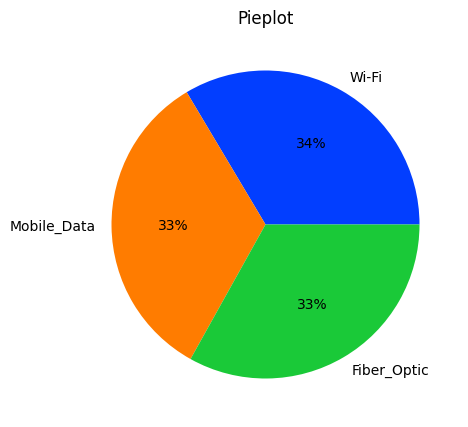

Jumlah : 
 Fiber_Optic    12247
Mobile_Data    12346
Wi-Fi          12417
Name: internet_option, dtype: int64
Percentage : 
 Fiber_Optic    33.091056
Mobile_Data    33.358552
Wi-Fi          33.550392
Name: internet_option, dtype: float64


In [77]:
# Visualize column with barplot
diagnostic_pie(df['internet_option'])

column vs target


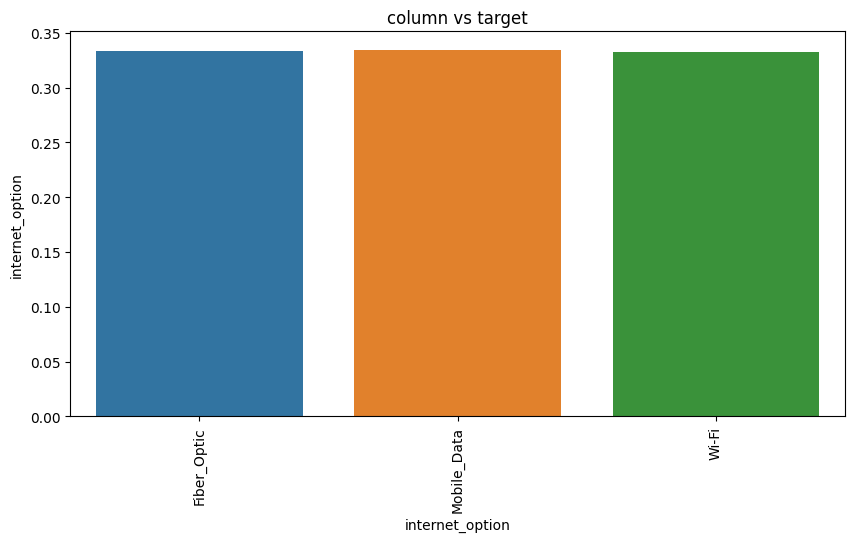

Jumlah target positif : 20018
Jumlah  : 
 internet_option
Fiber_Optic    6669
Mobile_Data    6697
Wi-Fi          6652
Name: internet_option, dtype: int64
Percentage : 
 internet_option
Fiber_Optic    33.315016
Mobile_Data    33.454891
Wi-Fi          33.230093
Name: internet_option, dtype: float64


In [78]:
# Visualize column internet_option to target
feature_target(df,'churn_risk_score',1,'internet_option')

Terlihat untuk column internet option memiliki perbandingan hampir sama untuk semua variable dengan persentase 33% dan dibandingkan dengan target positif juga memiliki kesamaan pattern. menunjukan tidak memiliki korelasi terkait dengan churn customer.


### Column used_special_discount

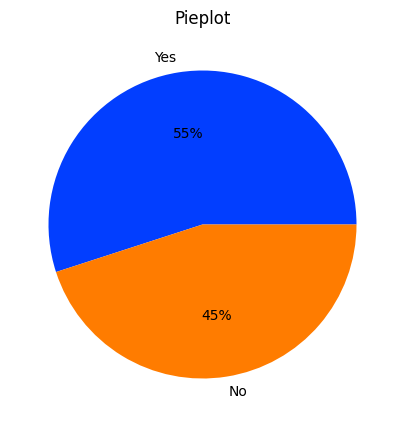

Jumlah : 
 No     16657
Yes    20353
Name: used_special_discount, dtype: int64
Percentage : 
 No     45.006755
Yes    54.993245
Name: used_special_discount, dtype: float64


In [79]:
# Visualize column with barplot
diagnostic_pie(df['used_special_discount'])

column vs target


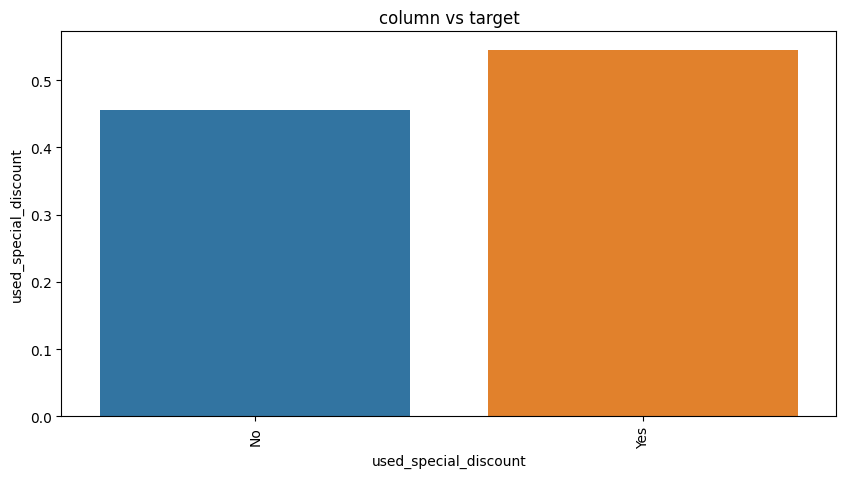

Jumlah target positif : 20018
Jumlah  : 
 used_special_discount
No      9106
Yes    10912
Name: used_special_discount, dtype: int64
Percentage : 
 used_special_discount
No     45.48906
Yes    54.51094
Name: used_special_discount, dtype: float64


In [80]:
# Visualize column used_special_discount to target
feature_target(df,'churn_risk_score',1,'used_special_discount')

Untuk column used special discount terlihat mayoritas customernya menggunakan used spesial discount dengan persentase 55%. Dibandingkan dengan jumlah yang churn, persentasenya juga tetap sama polanya. Hal ini menunjukan tidak ada pengaruh signifikan dari penggunaan spesial discount atau tidak terhadap churn customer. 


### Column offer_application_preference

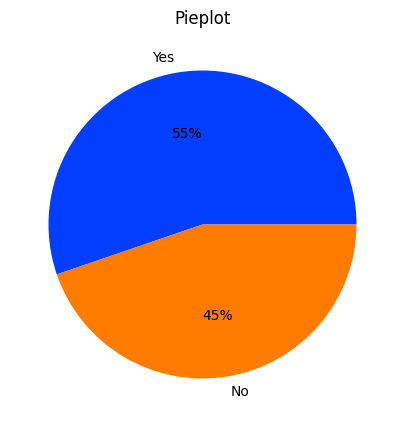

Jumlah : 
 No     16561
Yes    20449
Name: offer_application_preference, dtype: int64
Percentage : 
 No     44.747366
Yes    55.252634
Name: offer_application_preference, dtype: float64


In [81]:
# Visualize column with barplot
diagnostic_pie(df['offer_application_preference'])

column vs target


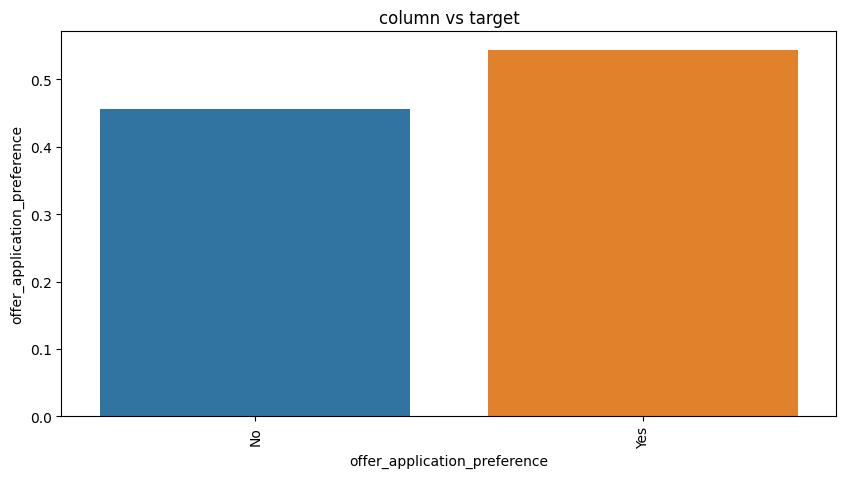

Jumlah target positif : 20018
Jumlah  : 
 offer_application_preference
No      9130
Yes    10888
Name: offer_application_preference, dtype: int64
Percentage : 
 offer_application_preference
No     45.608952
Yes    54.391048
Name: offer_application_preference, dtype: float64


In [82]:
# Visualize column offer_application_preference to target
feature_target(df,'churn_risk_score',1,'offer_application_preference')

Untuk column offer_application_preference terlihat mayoritas customernya memilih yes dengan persentase 55%, sedangkan untuk target positifnya hampir mirip namun persentase yes turun menjadi 54%. Terlihat adanya seikit korelasi terhadap target.


### Column past_complaint

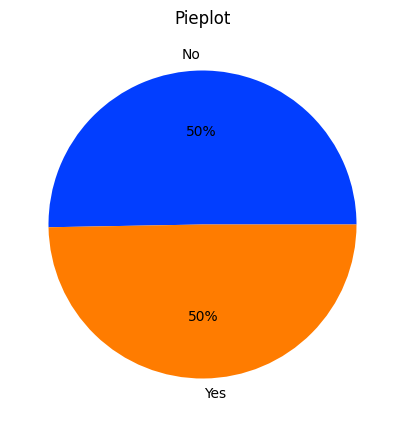

Jumlah : 
 No     18611
Yes    18399
Name: past_complaint, dtype: int64
Percentage : 
 No     50.286409
Yes    49.713591
Name: past_complaint, dtype: float64


In [83]:
# Visualize column with barplot
diagnostic_pie(df['past_complaint'])

column vs target


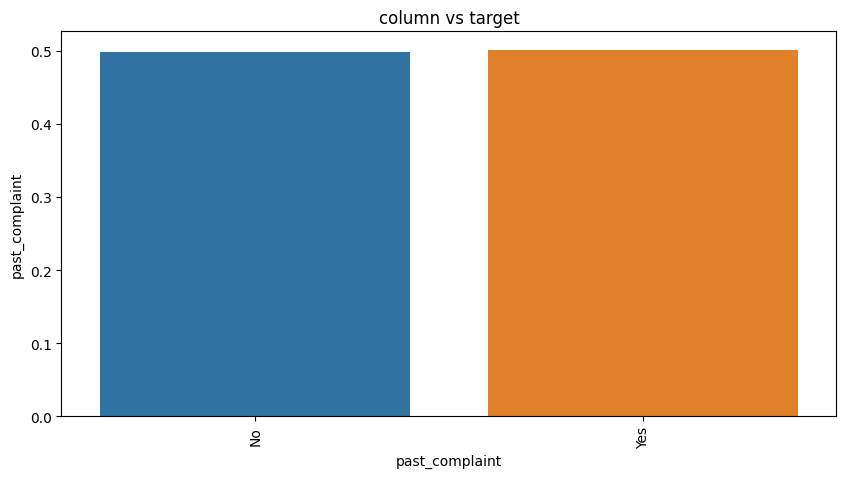

Jumlah target positif : 20018
Jumlah  : 
 past_complaint
No      9983
Yes    10035
Name: past_complaint, dtype: int64
Percentage : 
 past_complaint
No     49.870117
Yes    50.129883
Name: past_complaint, dtype: float64


In [84]:
# Visualize column past_complaint to target
feature_target(df,'churn_risk_score',1,'past_complaint')

Dari column past_complaint terlihat persentase customer yang pernah complaint dan tidak pernah complaint memiliki persentase yang hampir sama 50%, dengan detail tidak pernah complain 50.28 % dan pernah complaint 49.72%.

Sedangkan untuk yang churn, customer yang pernah complain persentasenya 50.12% dan tidak pernah complain 49.87%. patternya hampir mirip namun terlihat ada korelasi terhadap data churn meski tidak signifikan.

### Column complaint_status

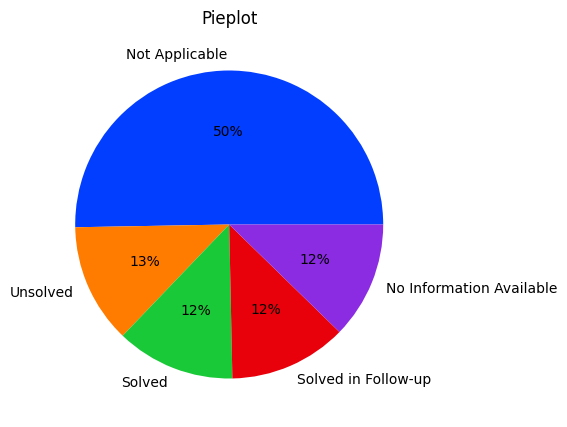

Jumlah : 
 No Information Available     4551
Not Applicable              18611
Solved                       4622
Solved in Follow-up          4579
Unsolved                     4647
Name: complaint_status, dtype: int64
Percentage : 
 No Information Available    12.296677
Not Applicable              50.286409
Solved                      12.488517
Solved in Follow-up         12.372332
Unsolved                    12.556066
Name: complaint_status, dtype: float64


In [85]:
# Visualize column with barplot
diagnostic_pie(df['complaint_status'])

column vs target


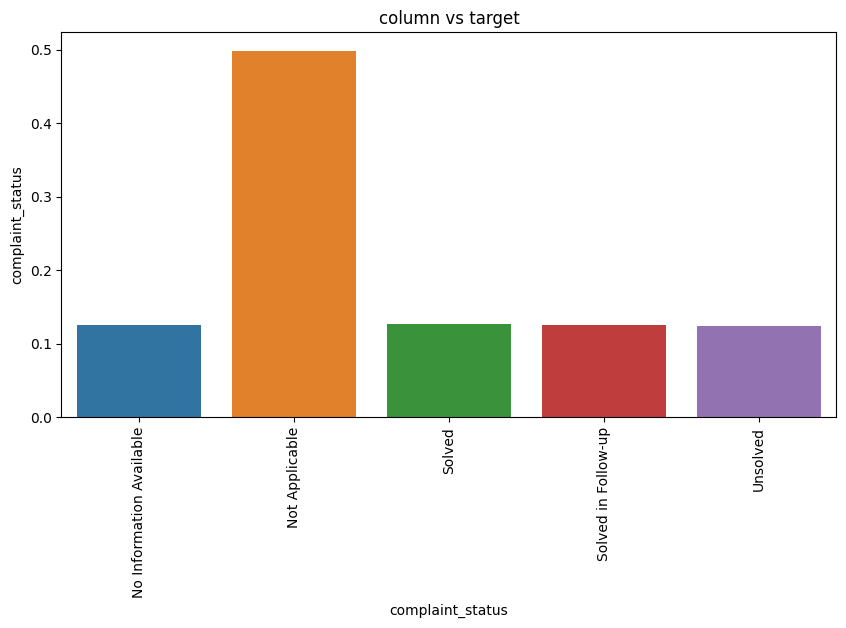

Jumlah target positif : 20018
Jumlah  : 
 complaint_status
No Information Available    2499
Not Applicable              9983
Solved                      2528
Solved in Follow-up         2516
Unsolved                    2492
Name: complaint_status, dtype: int64
Percentage : 
 complaint_status
No Information Available    12.483765
Not Applicable              49.870117
Solved                      12.628634
Solved in Follow-up         12.568688
Unsolved                    12.448796
Name: complaint_status, dtype: float64


In [86]:
# Visualize column complaint_status to target
feature_target(df,'churn_risk_score',1,'complaint_status')

Berdasarkan compaint status terlihat mayoritasnya adalah not applicable dengan persentase 50.28%, pengertian not applicable disini adalah karena 50.28% customernya tidak pernah complaint sehingga ditulis dengan not applicable.

Sedangkan untuk complaint_status variable yang sebenarnya yaitu no information, solved, solved in follow up, dan unsolved. Dengan persentase yang hampir sama 12.5%.

Yang menarik adalah dibandingkan dengan data churn, column complain status tidak memiliki pengaruh terhadap churn. yang seharusnya ketika masalahnya tidak solved akan naik untuk churn, namun tidak. begitu pun yang solved, seharusnya bisa menekan customer untuk churn namun tidak. 

Patternya masih sama dengan keseluruhan data. terbanyak churn adalah yang not applicable

### Column feedback

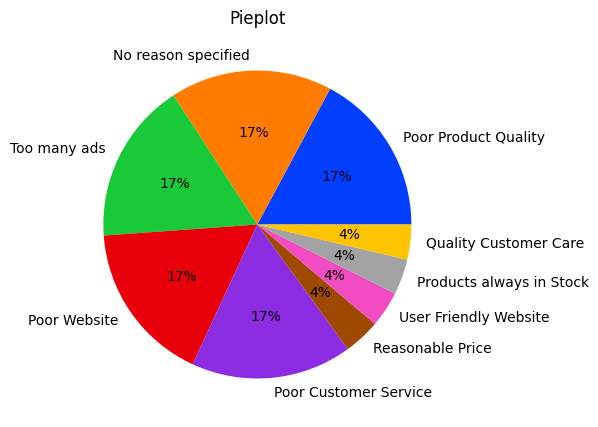

Jumlah : 
 No reason specified         6295
Poor Customer Service       6255
Poor Product Quality        6353
Poor Website                6273
Products always in Stock    1382
Quality Customer Care       1360
Reasonable Price            1417
Too many ads                6282
User Friendly Website       1393
Name: feedback, dtype: int64
Percentage : 
 No reason specified         17.008917
Poor Customer Service       16.900838
Poor Product Quality        17.165631
Poor Website                16.949473
Products always in Stock     3.734126
Quality Customer Care        3.674683
Reasonable Price             3.828695
Too many ads                16.973791
User Friendly Website        3.763848
Name: feedback, dtype: float64


In [87]:
# Visualize column with barplot
diagnostic_pie(df['feedback'])

column vs target


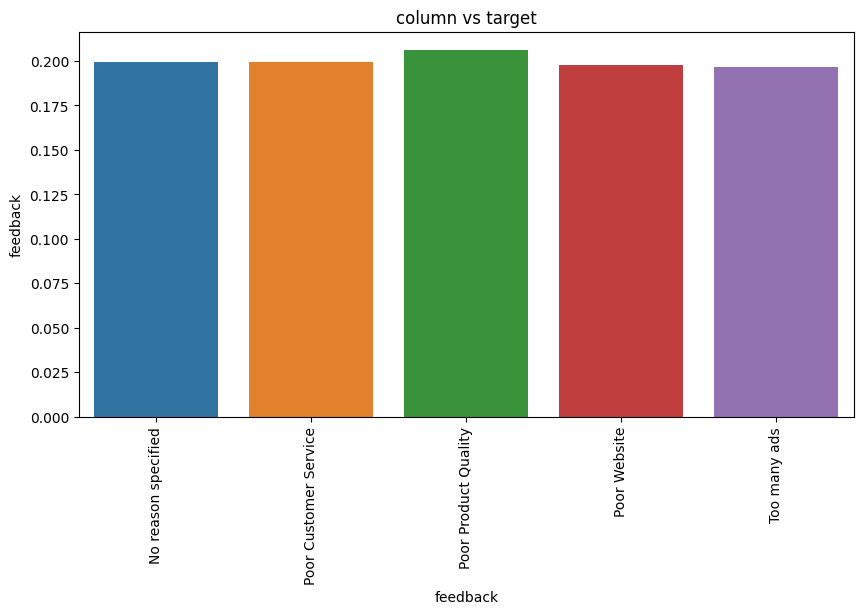

Jumlah target positif : 20018
Jumlah  : 
 feedback
No reason specified      3995
Poor Customer Service    3993
Poor Product Quality     4127
Poor Website             3964
Too many ads             3939
Name: feedback, dtype: int64
Percentage : 
 feedback
No reason specified      19.957039
Poor Customer Service    19.947048
Poor Product Quality     20.616445
Poor Website             19.802178
Too many ads             19.677290
Name: feedback, dtype: float64


In [88]:
# Visualize column feedback to target
feature_target(df,'churn_risk_score',1,'feedback')

Terlihat dari column feedback, mayoritas customer memiliki feedback negatif dengan masing- masing feedbck negatif 17% yaitu poor CS, poor product quality, poor website, dan too many ads. Untuk customer yang tidak memberikan feedback juga persentasenya sama dengan yang memberikan feedback negatif dengan persentase 17 %. Sedangkan untuk yang memberikan feedback positif hanya 16% dan terbagi menjadi 4 feedbcak categori dengan masing-masing 4%.

Dibandingkan dengan data churn terlihat sangat jelas korelasinya, customer yang memberikan feedback positif atau selama belanja merasa puas, tidak ada yang churn. sementara untuk customer yang tidak memberikan feedback positif sekitar 60-65 % nya tergolong churn.


## 4.3 - Check Correlation 


<Axes: >

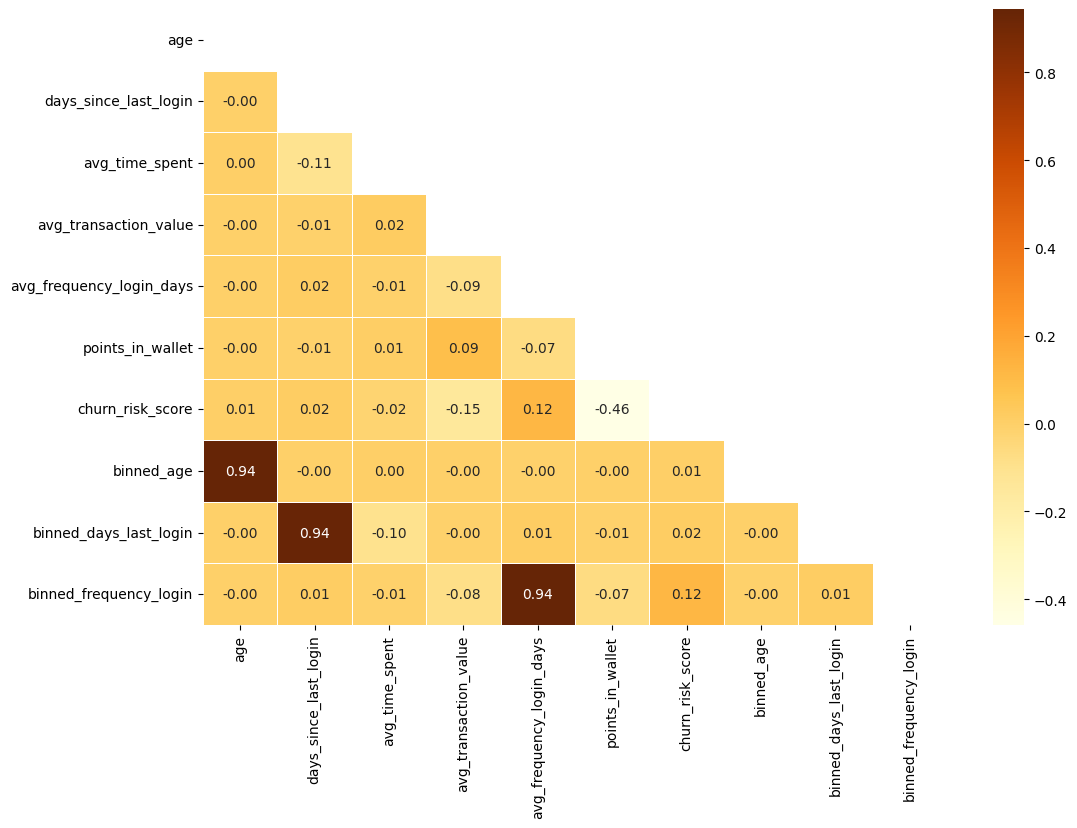

In [89]:
# Correlation
# Drop columns non numeric 
df1 = df[['age',	'days_since_last_login',	'avg_time_spent',	'avg_transaction_value',	'avg_frequency_login_days',	'points_in_wallet',	'churn_risk_score', 'binned_age',	'binned_days_last_login',	'binned_frequency_login']]

# Showing correlation using heatmap
fig, ax = plt.subplots(figsize=(12,8))

mask = np.triu(np.ones_like(df1.corr(method='spearman')))
sns.heatmap(df1.corr(method='spearman'), annot=True, cmap="YlOrBr", mask=mask, linewidth=0.5, fmt=".2f")

Terlihat dari pengecekan correlation menggunakan methode spearman karena distribusi datanya tidak normal, hasilnya sesuai dengan dari pemeriksaan saat proses EDA untuk column yang memiliki pengaruh signikan nilai correlasi cukup besar.

Dari hasil proses EDA dapat diketahui sebagai berikut:
1. Untuk column target diketahui mayoritas customer didataset adalh churn dengan persentase 54%. Hal ini sangat merugikan perusahaan.
2. Diketahui untuk outliers dari columns numeric ada yang bersifat natural dan dan tidak natural. Outliers tidak natural yaitu column days_since_last_login dengan nilai outliers -999 , kemudian column avg_time_spent diatas 1245 menit. 
3. Untuk distribusi data ada yang berdistribusi data normal, cukup miring, dan sangat miring.
4. Untuk missing values di dataset ini berdasarkan pengamatan di semua columns yang ada missing valuesnya berkategori MCAR, tidak ada pattern atau secara sistematis yang membuatnya missing.
5. Terkait perbandingan features terhadap target dan dibandingkan dengan populasinya dalam dataset, diketahui columns yang memiliki pengaruh cukup signifikan terhadap target yaitu column avg_transaction_value, avg_frequency_login_days, points_in_wallet, membership_category, joined_through_referral, preferred_offer_types, offer_application_preference, past_complain, dan feedback

# 5 - Feature Engineering

## 5.1 - Splitting between `X` and `y`

In [90]:
# Splitting between `X` and `y`

X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

In [91]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=24)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23686, 24)
Val Size :  (5922, 24)
Test Size :  (7402, 24)


## 5.2 - Handling Missing Values & Outliers

Berdasarkan hasil proses EDA diketahui ada 5 columns categoric yang missing values. Dan dari hasil pengecekan kesemuanya berkategori MCAR, sehingga handlingnya akan dilakukan saat pipeline menggunakan simple imputer berdasarkan most frequent

Sedangkan untuk outliers diketahui outliers tidak natural tidak termasuk column yang memiliki korelasi dengan target dan tidak dijadikan features. Sehingga tidak dilakukan handling. 

## 5.3 - Feature Selection

Untuk features selection akan menggunakan columns yang memiliki korelasi dengan target dari hasil pengecekan proses EDA dan correlation.

In [92]:
# Display X_train

X_train.head(1)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,binned_age,binned_days_last_login,binned_frequency_login
21854,bf1ee0ffb188d2d2,29,F,City,Premium Membership,2015-02-14,No,Gift Vouchers/Coupons,NaN,Fiber_Optic,03:26:53,17,149.71,46460.4,8.0,716.95,Yes,No,Yes,Unsolved,Poor Website,2,3,1.0


In [93]:
# Drop Columns

X_train.drop(['user_id',	'age',	'gender', 'avg_time_spent', 'region_category',	'joining_date',	'medium_of_operation',	'internet_option',	'last_visit_time',	'days_since_last_login'		,'avg_frequency_login_days',	'used_special_discount'	,'complaint_status','binned_age',	'binned_days_last_login'], axis=1, inplace=True)
X_val.drop(['user_id',	'age',	'gender', 'avg_time_spent', 'region_category',	'joining_date',	'medium_of_operation',	'internet_option',	'last_visit_time',	'days_since_last_login'		,'avg_frequency_login_days',	'used_special_discount'	,'complaint_status','binned_age',	'binned_days_last_login'], axis=1, inplace=True)
X_test.drop(['user_id',	'age',	'gender', 'avg_time_spent', 'region_category',	'joining_date',	'medium_of_operation',	'internet_option',	'last_visit_time',	'days_since_last_login'		,'avg_frequency_login_days',	'used_special_discount'	,'complaint_status','binned_age',	'binned_days_last_login'], axis=1, inplace=True)
X_train.head(1)

,membership_category,joined_through_referral,preferred_offer_types,avg_transaction_value,points_in_wallet,offer_application_preference,past_complaint,feedback,binned_frequency_login
21854,Premium Membership,No,Gift Vouchers/Coupons,46460.4,716.95,No,Yes,Poor Website,1.0


## 5.4 - Get Numerical Columns and Categorical Columns

In [94]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_transaction_value', 'points_in_wallet', 'binned_frequency_login']
Categorical Columns :  ['membership_category', 'joined_through_referral', 'preferred_offer_types', 'offer_application_preference', 'past_complaint', 'feedback']


## 5.5 - Pipeline

In [95]:
# Create A Pipeline

num_pipeline = make_pipeline(StandardScaler())

# Process handling missval using simple imputer 
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [96]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

In [97]:
# Check shape X_train 
X_train.shape

(23686, 27)

# 6 - Sequential API

## 6.1 - Model Definition

Pada bagian model definition untuk Sequential API disini saya menggunakan 2 layers dengan layers pertama 27 neuron dan layar ke dua menggunakan 54 neurons. Dengan hyperparameter activation layer relu, dan activation untuk binary sigmoid. 

Untuk mencari nilai loss akan menggunakan binary_crossentropy karena targetnya binary dan optimizernya Adam yang cocok untuk data besar dengan penurunan gradient sumber dari tensor flow dengan link [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).

Untuk proses fitting datanya menggunakan epochs 30/ 30 kali pengulangan dengan pembagian batch per 1000 data sehingga akan ada 24 kelompok. Untuk metric yang digunakan sesuai objectif dengan mencari nilai recall terbesar. Dan untuk settingan lainnya sesuai default.

In [98]:
# Create Sequential API


tf.keras.backend.clear_session()
model_sequential = Sequential()
model_sequential.add(Dense(27, activation='relu', input_shape=(27,))) 
model_sequential.add(Dense(54, activation='relu')) 
model_sequential.add(Dense(1, activation='sigmoid')) 

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Recall'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 dense_1 (Dense)             (None, 54)                1512      
                                                                 
 dense_2 (Dense)             (None, 1)                 55        
                                                                 
Total params: 2,323
Trainable params: 2,323
Non-trainable params: 0
_________________________________________________________________


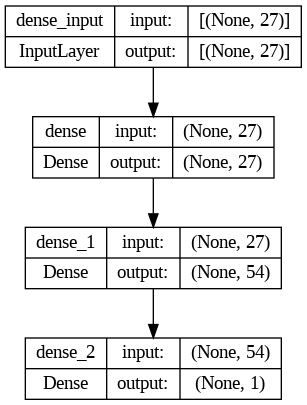

In [99]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 6.2 - Model Training

In [100]:
# Train the Model

%%time
history_seq = model_sequential.fit(X_train, 
                                   y_train,
                                   epochs=30,
                                   validation_data=(X_val, y_val),
                                   batch_size=1000)

Epoch 1/30
24/24 [==============================] - 5s 49ms/step - loss: 0.6580 - recall: 0.7544 - val_loss: 0.6172 - val_recall: 0.8728
Epoch 2/30
24/24 [==============================] - 0s 9ms/step - loss: 0.5711 - recall: 0.8536 - val_loss: 0.5229 - val_recall: 0.8370
Epoch 3/30
24/24 [==============================] - 0s 13ms/step - loss: 0.4705 - recall: 0.8320 - val_loss: 0.4137 - val_recall: 0.8376
Epoch 4/30
24/24 [==============================] - 0s 9ms/step - loss: 0.3640 - recall: 0.8277 - val_loss: 0.3173 - val_recall: 0.8178
Epoch 5/30
24/24 [==============================] - 0s 10ms/step - loss: 0.2954 - recall: 0.8304 - val_loss: 0.2767 - val_recall: 0.8279
Epoch 6/30
24/24 [==============================] - 0s 9ms/step - loss: 0.2708 - recall: 0.8444 - val_loss: 0.2649 - val_recall: 0.8455
Epoch 7/30
24/24 [==============================] - 0s 9ms/step - loss: 0.2629 - recall: 0.8636 - val_loss: 0.2608 - val_recall: 0.8364
Epoch 8/30
24/24 [===========================

## 6.3 - Model Evaluation

In [101]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,recall,val_loss,val_recall
0,0.657967,0.754408,0.617167,0.872801
1,0.571122,0.853643,0.522859,0.836998
2,0.470511,0.832033,0.413735,0.837626
3,0.363974,0.827664,0.317345,0.817839
4,0.295402,0.830395,0.276742,0.827889
5,0.270765,0.844437,0.264932,0.845477
6,0.262900,0.863629,0.260817,0.836369
7,0.259176,0.863005,0.261424,0.940955
8,0.257779,0.882197,0.257788,0.815327
9,0.255633,0.881495,0.254443,0.884422


<Axes: >

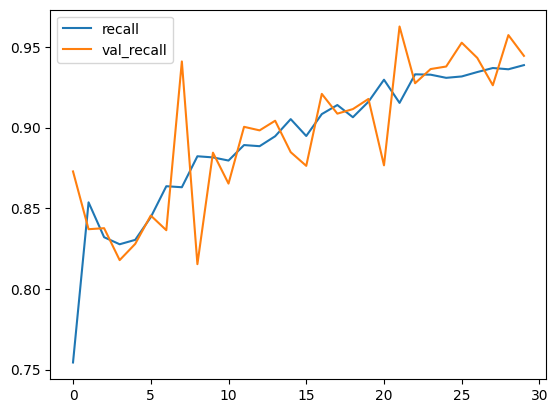

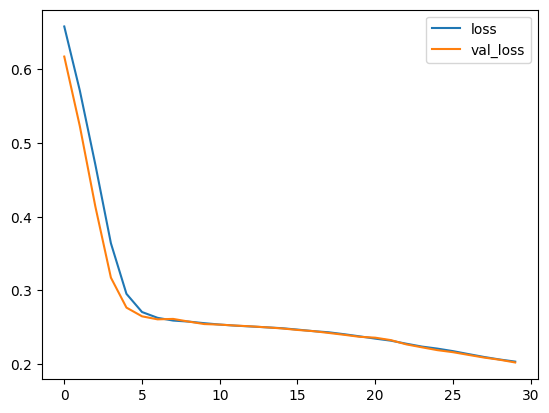

In [102]:
# Plot Training Results

history_seq_df[['recall', 'val_recall']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [103]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

232/232 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3386
           1       0.93      0.94      0.93      4016

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



Dari hasil fit train dan val diketahui berdasarkan nilai loss model sequent ini tidak overfit dan tergolong goodfit dimana train dan val losnya kecil sekali gapnya dengan nilai 22.55% dan 22.40%.

Untuk nilai recall train dan val pada awalnya terjadi ledakan gradient untuk val recall score di awal2 epoch, namun diakhirnya menunjukan ke arah konvergen dan gap dengan trainnya tidak jauh. Dengan nilai recal score train terakhirnya adalah 93.22% dan val score 95.38%.

Bila dibandingkan dengan nilai test, model sequential ini juga termasuk goodfit dan tidak over fit dimana nilai recal scorenya testnya 95%, dengan nilai test 95% atau lebih bagus dari train ada kemungkinan datanya tidak teracak dengan baik sehingga saat test model bisa mengenali lebih baik dibanding train.

# 7 - Functional API

## 7.1 - Model Definition

Untuk Functional API secara default menggunakan activation layer relu dan untuk layer output tetap menggunakan sigmoid untuk binary. Untuk pengulangannya menggunakan 20 epochs dan batch sizenya 1000 data .

In [104]:
# Create Functional Model

tf.keras.backend.clear_session()
input_layer = Input(shape=(27,))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(14, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='Recall')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 27)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           896         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 14)           462         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 41)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

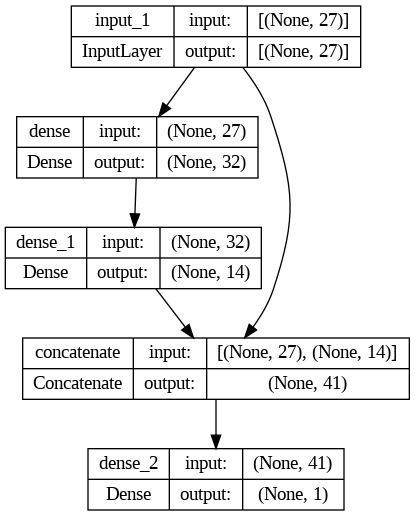

In [105]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 7.2 - Model Training

In [106]:
# Train the Model

%%time
history_func = model_functional.fit(X_train,
                                    y_train,
                                    epochs=20,
                                    validation_data=(X_val, y_val),
                                    batch_size=1000)

Epoch 1/20
24/24 [==============================] - 3s 24ms/step - loss: 0.6600 - recall: 0.6220 - val_loss: 0.6280 - val_recall: 0.7217
Epoch 2/20
24/24 [==============================] - 0s 7ms/step - loss: 0.6033 - recall: 0.7399 - val_loss: 0.5668 - val_recall: 0.7644
Epoch 3/20
24/24 [==============================] - 0s 9ms/step - loss: 0.5312 - recall: 0.7885 - val_loss: 0.4820 - val_recall: 0.8059
Epoch 4/20
24/24 [==============================] - 0s 9ms/step - loss: 0.4373 - recall: 0.8108 - val_loss: 0.3819 - val_recall: 0.8009
Epoch 5/20
24/24 [==============================] - 0s 7ms/step - loss: 0.3456 - recall: 0.8057 - val_loss: 0.3065 - val_recall: 0.8062
Epoch 6/20
24/24 [==============================] - 0s 5ms/step - loss: 0.2904 - recall: 0.8160 - val_loss: 0.2717 - val_recall: 0.7968
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: 0.2679 - recall: 0.8327 - val_loss: 0.2593 - val_recall: 0.8138
Epoch 8/20
24/24 [=============================

## 7.3 - Model Evaluation

In [107]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,recall,val_loss,val_recall
0,0.659995,0.622016,0.627966,0.721734
1,0.603261,0.739897,0.566810,0.764447
2,0.531220,0.788501,0.482025,0.805905
3,0.437339,0.810813,0.381891,0.800879
4,0.345596,0.805664,0.306510,0.806219
5,0.290393,0.815962,0.271747,0.796797
6,0.267890,0.832735,0.259310,0.813756
7,0.260034,0.854501,0.255698,0.930905
8,0.256597,0.856764,0.252227,0.894472
9,0.254145,0.880090,0.251531,0.938442


<Axes: >

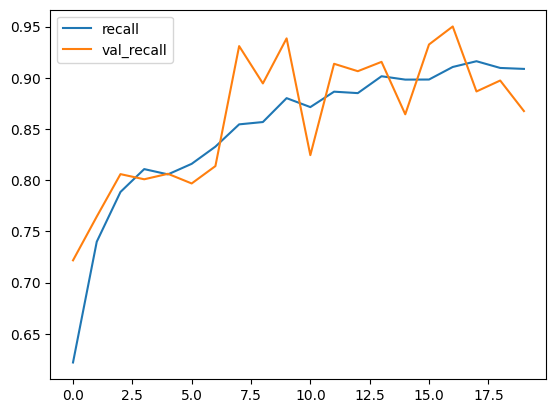

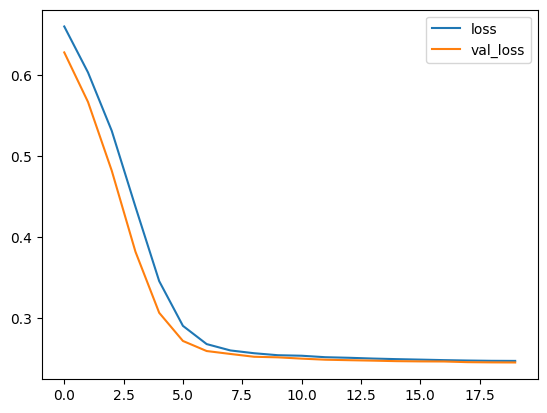

In [108]:
# Plot Training Results

history_func_df[['recall', 'val_recall']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [109]:
# Evaluate Test-Set

from sklearn.metrics import classification_report

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3386
           1       0.93      0.86      0.89      4016

    accuracy                           0.88      7402
   macro avg       0.88      0.89      0.88      7402
weighted avg       0.89      0.88      0.88      7402



Dari hasil evaluasi dapat terlihat untuk functional API nilai train dan val recall score termasuk goodfit dengan gap yang sangat kecil jaraknya yaitu 0.14%, dengan nilai train recall score 90.21% dan val recall score 90.35%. Sedangkan untuk lostnya masih di 24.7%. 

Untuk dibandingkan dengan nilai testnya model ini termasuk goodfit dengan perbedaan dengan train lebi bagus 1%. Nilai recal score test 89%. 

Kembali ke nilai loss yang masih 24.7% akan coba dilakukan improvement untuk menurunkan nilai lossnya.

# 8 - Sequential API Improvement

Pada bagian improvement pertama yang dilakukan adalah menggunakan pipeline tensorflow dengan membagi bathnya 500, dan menshufle dengan jumlah sebanyak data. Untuk repeat tidak dilakukan karena ingin melihat grafiknya dengan epochs.

Setelah menggunakan pipeline dilakukan juga callback early stoping dengan pembatasan nilai 5, yaitu bila tidak ada yang lebih bagus nilai recall score dalam 5 epoch ke depan akan lsg di stop.

Selain itu dilakukan tuning initializer atau pembobotan dengan beberapa initializer dan didaptkan yang terbaik 'HeUniform', untuk activation tetap sama dengan relu, namun ditambahkan batch normalixation agar pada setiap batch kembali dilakukan normalisasi.

Untuk learning rate opptimizer adam sudah dicoba dengan pengurangan atau penambahan, namun masih terbaik yang default 0.001 sehingga dikembalikan ke deafult saja.

## 8.1 - Tensorflow Pipeline

In [110]:
# Pipeline Tensorflow
train_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(500).shuffle(len(X_train)).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(500)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(500)



## 8.2 - Model Definition

In [111]:
# Create Sequential API


tf.keras.backend.clear_session()
model_sequential_improve = Sequential()
model_sequential_improve.add(Dense(27, activation='relu', input_shape=(27,), kernel_initializer='HeUniform')) 
model_sequential_improve.add(BatchNormalization())
model_sequential_improve.add(Dense(184, activation='relu')) 
model_sequential_improve.add(BatchNormalization())
model_sequential_improve.add(Dense(1, activation='sigmoid')) 

# Compile
model_sequential_improve.compile(loss='binary_crossentropy',
                         optimizer= 'Adam',
                         metrics=['Recall'])

model_sequential_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 batch_normalization (BatchN  (None, 27)               108       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 184)               5152      
                                                                 
 batch_normalization_1 (Batc  (None, 184)              736       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 185       
                                                                 
Total params: 6,937
Trainable params: 6,515
Non-trainabl

In [112]:
#callback early stoping
es = EarlyStopping(monitor='recall',patience=5, mode='min', verbose=1)

## 8.3 - Model Training

In [113]:
# Train the Model

%%time
history_seq_improve = model_sequential_improve.fit(train_pipe,epochs=20, validation_data=val_pipe)

Epoch 1/20
48/48 [==============================] - 2s 10ms/step - loss: 0.4859 - recall: 0.7985 - val_loss: 0.5332 - val_recall: 0.9171
Epoch 2/20
48/48 [==============================] - 0s 6ms/step - loss: 0.2942 - recall: 0.8646 - val_loss: 0.4290 - val_recall: 0.9190
Epoch 3/20
48/48 [==============================] - 0s 7ms/step - loss: 0.2725 - recall: 0.8780 - val_loss: 0.3566 - val_recall: 0.8502
Epoch 4/20
48/48 [==============================] - 0s 7ms/step - loss: 0.2635 - recall: 0.8758 - val_loss: 0.3138 - val_recall: 0.8452
Epoch 5/20
48/48 [==============================] - 1s 10ms/step - loss: 0.2575 - recall: 0.8877 - val_loss: 0.2855 - val_recall: 0.8552
Epoch 6/20
48/48 [==============================] - 1s 10ms/step - loss: 0.2527 - recall: 0.8879 - val_loss: 0.2700 - val_recall: 0.8662
Epoch 7/20
48/48 [==============================] - 1s 10ms/step - loss: 0.2496 - recall: 0.8912 - val_loss: 0.2604 - val_recall: 0.8788
Epoch 8/20
48/48 [==========================

In [114]:
# Train the Model callback

%%time
history_seq_improve_cb = model_sequential_improve.fit(train_pipe,epochs=20, validation_data=val_pipe, callbacks=[es])

Epoch 1/20
48/48 [==============================] - 0s 6ms/step - loss: 0.1772 - recall: 0.9436 - val_loss: 0.1934 - val_recall: 0.9504
Epoch 2/20
48/48 [==============================] - 0s 6ms/step - loss: 0.1729 - recall: 0.9469 - val_loss: 0.1839 - val_recall: 0.9397
Epoch 3/20
48/48 [==============================] - 0s 6ms/step - loss: 0.1685 - recall: 0.9482 - val_loss: 0.1832 - val_recall: 0.9607
Epoch 4/20
48/48 [==============================] - 0s 6ms/step - loss: 0.1661 - recall: 0.9501 - val_loss: 0.1827 - val_recall: 0.9501
Epoch 5/20
48/48 [==============================] - 0s 6ms/step - loss: 0.1634 - recall: 0.9501 - val_loss: 0.1802 - val_recall: 0.9488
Epoch 6/20
48/48 [==============================] - 0s 6ms/step - loss: 0.1624 - recall: 0.9502 - val_loss: 0.1769 - val_recall: 0.9532
Epoch 6: early stopping
CPU times: user 2.54 s, sys: 127 ms, total: 2.67 s
Wall time: 3.22 s


## 8.4 - Model Evaluation

In [115]:
# Create DataFrame

history_seq_improve_df = pd.DataFrame(history_seq_improve.history)
history_seq_improve_df

,loss,recall,val_loss,val_recall
0,0.485882,0.798487,0.533229,0.917085
1,0.294216,0.864565,0.429047,0.918970
2,0.272477,0.877984,0.356646,0.850188
3,0.263513,0.875800,0.313828,0.845163
4,0.257515,0.887736,0.285459,0.855214
5,0.252741,0.887892,0.269982,0.866206
6,0.249639,0.891169,0.260435,0.878769
7,0.246466,0.901857,0.257372,0.868090
8,0.242224,0.904743,0.251104,0.895729
9,0.238945,0.903573,0.250351,0.885678


In [116]:
# Create DataFrame Earlystop

cb_history_seq_improve_df = pd.DataFrame(history_seq_improve_cb.history)
cb_history_seq_improve_df

,loss,recall,val_loss,val_recall
0,0.177247,0.943595,0.193355,0.950377
1,0.172856,0.946950,0.183864,0.939699
2,0.168480,0.948198,0.183236,0.960741
3,0.166136,0.950070,0.182701,0.950063
4,0.163446,0.950070,0.180159,0.948807
5,0.162407,0.950226,0.176867,0.953203


<Axes: >

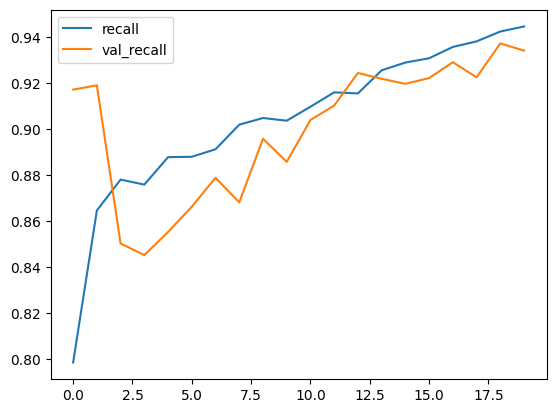

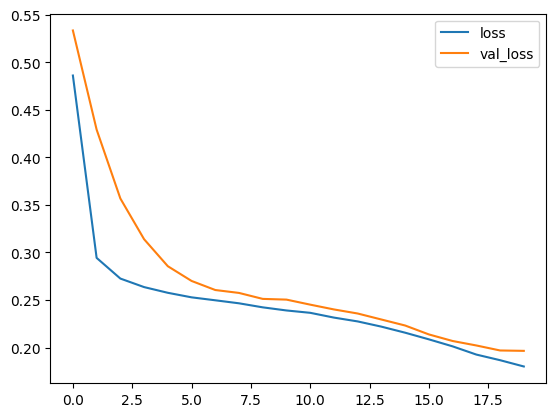

In [117]:
# Plot Training Results

history_seq_improve_df[['recall', 'val_recall']].plot()
history_seq_improve_df[['loss', 'val_loss']].plot()

<Axes: >

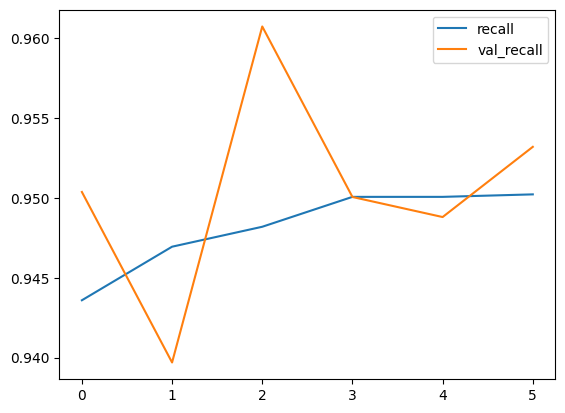

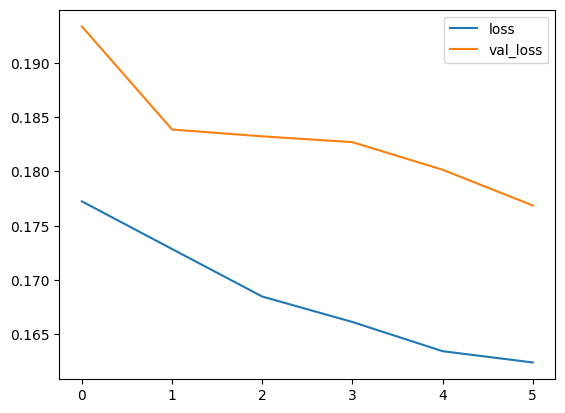

In [118]:
# Plot Training Results ES

cb_history_seq_improve_df[['recall', 'val_recall']].plot()
cb_history_seq_improve_df[['loss', 'val_loss']].plot()

In [119]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq_improve = model_sequential_improve.predict(X_test)
y_pred_seq_improve = np.where(y_pred_seq_improve >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

232/232 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3386
           1       0.93      0.94      0.93      4016

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



Dari hasil evaluasi, untuk penggunaan earlystoping, model sudah berhenti pada epochs ke 7 dimana nilai recall score trainnya 95.13 dan nilai valnya 95.97, bila dilihat berdasarkan selisih nilai termasuk goodfit karena selisihnya hanya 0.8%. Namun bila dilihat secara grafik terlihat gap yang sangat jauh namun hal ini karena skala perbandingan yang diambilnya sangat kecil dengan jarak 0.5% setiap skala nilai sumbu y nya. Untuk nilai lossnya 15.53% untuk train dan val 17%. selisih 2 %.

Dibandingkan dengan model improvement tanpa early stop nilai recal train 94.8% dan valnya 93.9% terpaut 1 %, model ini juga masih tergolong goodfit, sengkan untuk nilai lossnya train 16,8% dan 17,9%.

Bila dibandingkan dengan nilai test nilai recall pembulatanya adalah 95% yang berarti model ini sudah goodfit dengan nilai metric antara train dan testnya yang hampir sama dan scorenya sangat baik yaitu 95%. 

# 9 - Functional API Improvement

## 9.1 - Model Definition

Untuk model functional API improvement yang dilakukan adalah menggunakan pipeline tensorflow dengan setingan pipeline sama dengan yang sequential improvement. Kemudian dilakukan improvement dalam pembobotan menggunakan initializer GlorotNormal.

Selain itu juga pada learning rate optimizer ditirunkan kecepatannya menjadi 0.01. Selain dari hal tersebut jumlah neuronnya juga coba dibedakan dimana neuron hiden layer 1 5x lipat dari neuron input layer.

In [120]:
# Create Functional Model

tf.keras.backend.clear_session()
input_layer = Input(shape=(27,))
hidden_layer_1 = Dense(28, activation='relu', kernel_initializer='GlorotNormal')(input_layer)
hidden_layer_2 = Dense(140, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_improve = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_improve.compile(loss='binary_crossentropy',
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics='Recall')
model_functional_improve.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 27)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 28)           784         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 140)          4060        ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 167)          0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

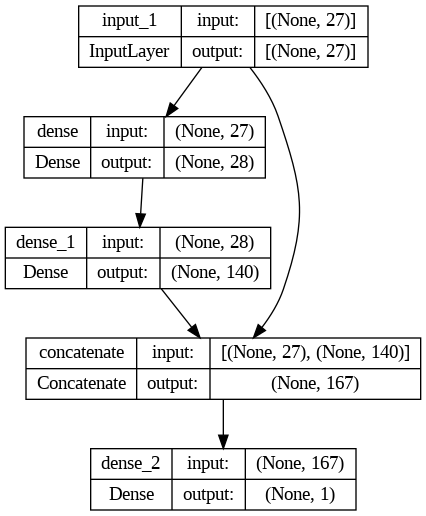

In [121]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_improve, show_shapes=True)

## 9.2 - Model Training

In [122]:
# Train the Model

%%time
history_func_improve = model_functional_improve.fit(train_pipe,
                                    epochs=20,
                                    validation_data=val_pipe)

Epoch 1/20
48/48 [==============================] - 2s 10ms/step - loss: 0.3318 - recall: 0.8540 - val_loss: 0.2540 - val_recall: 0.8006
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 0.2528 - recall: 0.8886 - val_loss: 0.2486 - val_recall: 0.9149
Epoch 3/20
48/48 [==============================] - 0s 5ms/step - loss: 0.2458 - recall: 0.9066 - val_loss: 0.2315 - val_recall: 0.9265
Epoch 4/20
48/48 [==============================] - 0s 4ms/step - loss: 0.2123 - recall: 0.9318 - val_loss: 0.1902 - val_recall: 0.9598
Epoch 5/20
48/48 [==============================] - 0s 5ms/step - loss: 0.1863 - recall: 0.9412 - val_loss: 0.1715 - val_recall: 0.9359
Epoch 6/20
48/48 [==============================] - 0s 4ms/step - loss: 0.1797 - recall: 0.9422 - val_loss: 0.1753 - val_recall: 0.9629
Epoch 7/20
48/48 [==============================] - 0s 5ms/step - loss: 0.1758 - recall: 0.9448 - val_loss: 0.1626 - val_recall: 0.9356
Epoch 8/20
48/48 [=============================

## 9.3 - Model Evaluation

In [123]:
# Create DataFrame

history_func_improve_df = pd.DataFrame(history_func_improve.history)
history_func_improve_df

,loss,recall,val_loss,val_recall
0,0.331785,0.854033,0.254005,0.800565
1,0.252837,0.888594,0.248602,0.914887
2,0.245755,0.906616,0.231490,0.926508
3,0.212296,0.931815,0.190207,0.959799
4,0.186285,0.941176,0.171540,0.935930
5,0.179712,0.942191,0.175314,0.962940
6,0.175823,0.944843,0.162631,0.935616
7,0.168401,0.948744,0.175574,0.907349
8,0.173074,0.944765,0.166284,0.961055
9,0.170332,0.947730,0.163718,0.922111


<Axes: >

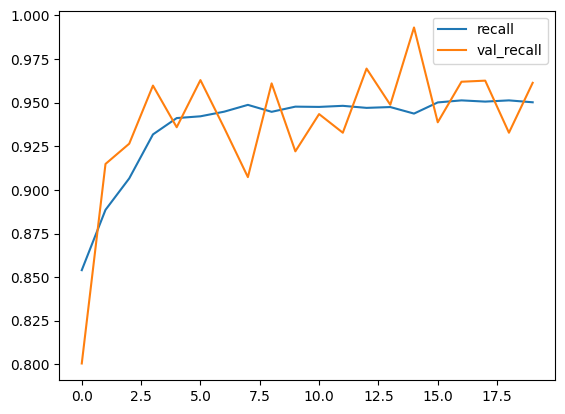

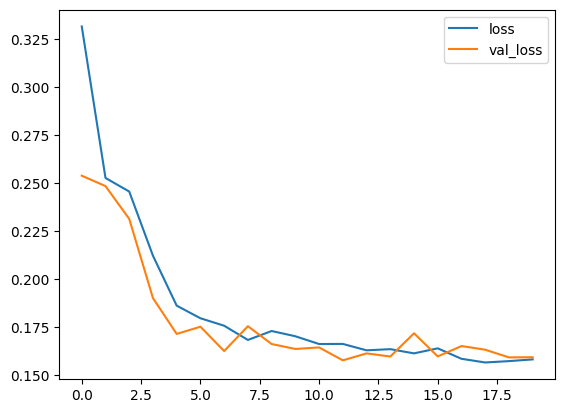

In [124]:
# Plot Training Results

history_func_improve_df[['recall', 'val_recall']].plot()
history_func_improve_df[['loss', 'val_loss']].plot()

In [125]:
# Evaluate Test-Set

from sklearn.metrics import classification_report

y_pred_func_improve = model_functional_improve.predict(X_test)
y_pred_func_improve = np.where(y_pred_func_improve >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_improve))

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3386
           1       0.92      0.96      0.94      4016

    accuracy                           0.93      7402
   macro avg       0.93      0.93      0.93      7402
weighted avg       0.93      0.93      0.93      7402



Berdasarkan hasil evaluasi didapatkan hasil untuk functional API improvement barhasil memerikan improvement pada loss, dimana tanpa adanya improvement nilai lossnya 24,7% dan setelah improvemnt losnya menjadi 15.7%, turun sekitar 9%. 
Sementara nilai recal score testnya masih tetap di 89% dan train recal scorenya naik menjadi 95%. Meskipun terlihat ada gap yang semakin besar antara recal score  , namun masih tergolong goodfit

# 10 - Model Saving

In [126]:
# Save Pipeline

import pickle

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [127]:
# Summary of Model Sequential

model_sequential_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 batch_normalization (BatchN  (None, 27)               108       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 184)               5152      
                                                                 
 batch_normalization_1 (Batc  (None, 184)              736       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 185       
                                                                 
Total params: 6,937
Trainable params: 6,515
Non-trainabl

In [128]:
# Freeze Model

model_sequential_improve.trainable = False
model_sequential_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 batch_normalization (BatchN  (None, 27)               108       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 184)               5152      
                                                                 
 batch_normalization_1 (Batc  (None, 184)              736       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 185       
                                                                 
Total params: 6,937
Trainable params: 0
Non-trainable pa

In [129]:
# Save ANN Model

model_sequential_improve.save('churn_model.h5')

# 11 - Model Inference

## Load Model

In [130]:
# Load the Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = pickle.load(file_1)

model_ann = load_model('churn_model.h5')

## Inference

In [131]:
# Create Inference Data


data_inf = {
    'user_id':'123as',
    'age': 31,
    'gender': 'M',
    'region_category': 'Town',
    'membership_category': 'Premium Membership',
    'joining_date': '2020-04-05',
    'joined_through_referral': 'Yes',
    'preferred_offer_types': 'Credit/Debit Card Offers',
    'medium_of_operation': 'Smartphone',
    'internet_option': 'Wi-Fi',
    'last_visit_time': '22:00:34',
    'days_since_last_login': 3,
    'avg_time_spent': 20,
    'avg_transaction_value': 10000,
    'avg_frequency_login_days': 15,
    'points_in_wallet': 150,
    'used_special_discount': 'Yes',
    'offer_application_preference': 'No',
    'past_complaint': 'No',
    'complaint_status': 'Not Applicable',
    'feedback': 'Reasonable Price'
}

data_inf = pd.DataFrame([data_inf])
data_inf

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,123as,31,M,Town,Premium Membership,2020-04-05,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,22:00:34,3,20,10000,15,150,Yes,No,No,Not Applicable,Reasonable Price


In [132]:
# Create Binning frequency login
bins = [-1, 10, 20, 30, 40, 50, 100]
labels =[1,2,3,4,6,7]
data_inf['binned_frequency_login'] = pd.cut(data_inf['avg_frequency_login_days'], bins,labels=labels).astype(float)
data_inf

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,binned_frequency_login
0,123as,31,M,Town,Premium Membership,2020-04-05,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,22:00:34,3,20,10000,15,150,Yes,No,No,Not Applicable,Reasonable Price,2.0


In [133]:
# Transform Inference-Set

data_inf_transform = model_pipeline.transform(data_inf)
data_inf_transform

array([[-0.99143072, -1.74404647,  0.02763966,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ]])

In [134]:
# Predict using Neural Network

y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 96ms/step


array([[0]])

Dari data inference diketahui hasil predictnya adalah customer tidak churn.

# 12 - Conclusion

Dari hasil proses EDA dapat diketahui bahwa perusahaan ini sedang dalam kondisi tidak baik dimana customer yang churn mencapai 54%, kemudian dari usaha usaha yang dilakukan seperti handle yang dilakukan customer service pada column complaint terlihat tidak menunjukan adanya pengaruh untuk customer tidak churn ke platform lain meskipun case nya sudah solved.

Dari proses EDA juga terlihat membership sangat mempengaruhi customernya akan churn dimana membership class platinum dan premium tidak ada yang churn. Selain itu feedback yang disampaikan Customer juga sangat mempengaruhi customer untuk churn dengan persentase feedback negatif secara keseluruhan lebih dari 60%. Dari hasil ini untuk perbaikan ke depannya perusahaan harus lebih serius menangani feedback negatif agar bisa berkurang customer yang churn.

Selanjutnya dalam hal permodelan didaptkan hasil terbaik adalah model ANN Sequential improvement dengan nilai recal score mencapai 95%. Hal ini menunjuka kesalahan prediksi customer yang tidak churn namun churn hanya 5%. Sudah sangat kecil. Sehingga menurut saya sudah bisa digunakan untuk memprediksi apakah  customernya akan churn atau tidak.

Untuk Improvement kedepannya perlu dilakukan lebih banyak trial error dalam penggunaan activation. Dalam model ini saya lebih banyak mencoba berdasarkan pembobotan initializer. Selain itu juga perlu dicoba untuk batch normalization untuk yang functional API Improvement.  